#     Loan Approval Prediction Using Machine Learning

### * Importing all the necessaary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

### * Loading the Data Set

In [2]:
df = pd.read_csv(r"C:\Users\david\OneDrive\Desktop\loan_approval_dataset.csv")

In [3]:
df1 = pd.read_csv(r"C:\Users\david\OneDrive\Desktop\loan_approval_dataset.csv")

### * Viewing the DataSet

In [5]:
df.head()

Loan_Id  No_Of_Dependents Self_Employed  Income_Annum  Loan_Amount  \
0        1                 2            No       9600000     29900000   
1        2                 0           Yes       4100000     12200000   
2        3                 3            No       9100000     29700000   
3        4                 3            No       8200000     30700000   
4        5                 5           Yes       9800000     24200000   

   Loan_Term  Cibil_Score  Residential_Assets_Value  Commercial_Assets_Value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   Luxury_Assets_Value  Bank_Asset_Value  Loan_Status  
0             22700000           8000000            1  
1              8800000           3300000            0  
2             33300000          12800000            0  
3             23300000           7900000            0  
4             29400000           5000000            0

In [6]:
df.tail()

Loan_Id  No_Of_Dependents Self_Employed  Income_Annum  Loan_Amount  \
4264     4265                 5           Yes       1000000      2300000   
4265     4266                 0           Yes       3300000     11300000   
4266     4267                 2            No       6500000     23900000   
4267     4268                 1            No       4100000     12800000   
4268     4269                 1            No       9200000     29700000   

      Loan_Term  Cibil_Score  Residential_Assets_Value  \
4264         12          317                   2800000   
4265         20          559                   4200000   
4266         18          457                   1200000   
4267          8          780                   8200000   
4268         10          607                  17800000   

      Commercial_Assets_Value  Luxury_Assets_Value  Bank_Asset_Value  \
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      Loan_Status  
4264            0  
4265            1  
4266            0  
4267            1  
4268            1

### * Information about DataSet

In [7]:
df.shape

(4269, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Loan_Id                   4269 non-null   int64 
 1   No_Of_Dependents          4269 non-null   int64 
 2   Self_Employed             4269 non-null   object
 3   Income_Annum              4269 non-null   int64 
 4   Loan_Amount               4269 non-null   int64 
 5   Loan_Term                 4269 non-null   int64 
 6   Cibil_Score               4269 non-null   int64 
 7   Residential_Assets_Value  4269 non-null   int64 
 8   Commercial_Assets_Value   4269 non-null   int64 
 9   Luxury_Assets_Value       4269 non-null   int64 
 10  Bank_Asset_Value          4269 non-null   int64 
 11  Loan_Status               4269 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 400.3+ KB


### * Statistics about the DataSet

In [9]:
df.describe()

Loan_Id  No_Of_Dependents  Income_Annum   Loan_Amount    Loan_Term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       Cibil_Score  Residential_Assets_Value  Commercial_Assets_Value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       Luxury_Assets_Value  Bank_Asset_Value  Loan_Status  
count         4.269000e+03      4.269000e+03  4269.000000  
mean          1.512631e+07      4.976692e+06     0.622160  
std           9.103754e+06      3.250185e+06     0.484904  
min           3.000000e+05      0.000000e+00     0.000000  
25%           7.500000e+06      2.300000e+06     0.000000  
50%           1.460000e+07      4.600000e+06     1.000000  
75%           2.170000e+07      7.100000e+06     1.000000  
max           3.920000e+07      1.470000e+07     1.000000

### * Checking the Null Values

In [10]:
df.isnull()

Loan_Id  No_Of_Dependents  Self_Employed  Income_Annum  Loan_Amount  \
0       False             False          False         False        False   
1       False             False          False         False        False   
2       False             False          False         False        False   
3       False             False          False         False        False   
4       False             False          False         False        False   
...       ...               ...            ...           ...          ...   
4264    False             False          False         False        False   
4265    False             False          False         False        False   
4266    False             False          False         False        False   
4267    False             False          False         False        False   
4268    False             False          False         False        False   

      Loan_Term  Cibil_Score  Residential_Assets_Value  \
0         False        False                     False   
1         False        False                     False   
2         False        False                     False   
3         False        False                     False   
4         False        False                     False   
...         ...          ...                       ...   
4264      False        False                     False   
4265      False        False                     False   
4266      False        False                     False   
4267      False        False                     False   
4268      False        False                     False   

      Commercial_Assets_Value  Luxury_Assets_Value  Bank_Asset_Value  \
0                       False                False             False   
1                       False                False             False   
2                       False                False             False   
3                       False                False             False   
4                       False                False             False   
...                       ...                  ...               ...   
4264                    False                False             False   
4265                    False                False             False   
4266                    False                False             False   
4267                    False                False             False   
4268                    False                False             False   

      Loan_Status  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
4264        False  
4265        False  
4266        False  
4267        False  
4268        False  

[4269 rows x 12 columns]

In [11]:
df.isnull().sum()

Loan_Id                     0
No_Of_Dependents            0
Self_Employed               0
Income_Annum                0
Loan_Amount                 0
Loan_Term                   0
Cibil_Score                 0
Residential_Assets_Value    0
Commercial_Assets_Value     0
Luxury_Assets_Value         0
Bank_Asset_Value            0
Loan_Status                 0
dtype: int64

<Axes: >

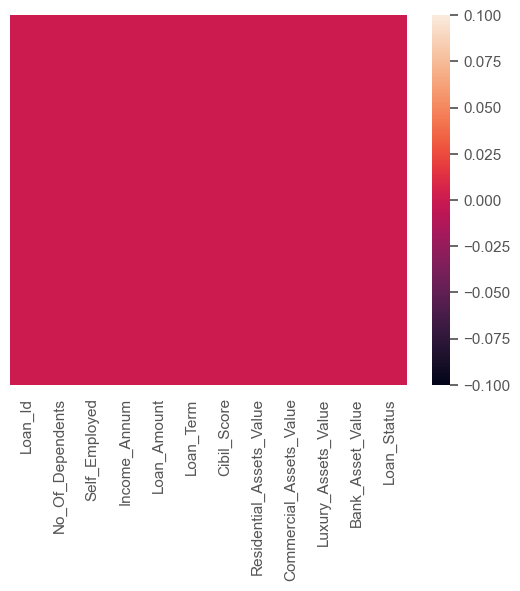

In [12]:
sns.heatmap(df.isnull(), yticklabels=False)

### * Replacing the 0's with the NaN Values

In [13]:
df[['Income_Annum','Loan_Amount','Loan_Term','Cibil_Score','Residential_Assets_Value','Commercial_Assets_Value',
  'Luxury_Assets_Value','Bank_Asset_Value']] = df[['Income_Annum','Loan_Amount','Loan_Term','Cibil_Score','Residential_Assets_Value','Commercial_Assets_Value',
  'Luxury_Assets_Value','Bank_Asset_Value']].replace(0,np.NaN)

In [14]:
df.head(20)

Loan_Id  No_Of_Dependents Self_Employed  Income_Annum  Loan_Amount  \
0         1                 2            No       9600000     29900000   
1         2                 0           Yes       4100000     12200000   
2         3                 3            No       9100000     29700000   
3         4                 3            No       8200000     30700000   
4         5                 5           Yes       9800000     24200000   
5         6                 0           Yes       4800000     13500000   
6         7                 5            No       8700000     33000000   
7         8                 2           Yes       5700000     15000000   
8         9                 0           Yes        800000      2200000   
9        10                 5            No       1100000      4300000   
10       11                 4           Yes       2900000     11200000   
11       12                 2           Yes       6700000     22700000   
12       13                 3           Yes       5000000     11600000   
13       14                 2           Yes       9100000     31500000   
14       15                 1            No       1900000      7400000   
15       16                 5            No       4700000     10700000   
16       17                 2           Yes        500000      1600000   
17       18                 4           Yes       2900000      9400000   
18       19                 2            No       2700000     10300000   
19       20                 5            No       6300000     14600000   

    Loan_Term  Cibil_Score  Residential_Assets_Value  Commercial_Assets_Value  \
0          12          778                 2400000.0               17600000.0   
1           8          417                 2700000.0                2200000.0   
2          20          506                 7100000.0                4500000.0   
3           8          467                18200000.0                3300000.0   
4          20          382                12400000.0                8200000.0   
5          10          319                 6800000.0                8300000.0   
6           4          678                22500000.0               14800000.0   
7          20          382                13200000.0                5700000.0   
8          20          782                 1300000.0                 800000.0   
9          10          388                 3200000.0                1400000.0   
10          2          547                 8100000.0                4700000.0   
11         18          538                15300000.0                5800000.0   
12         16          311                 6400000.0                9600000.0   
13         14          679                10800000.0               16600000.0   
14          6          469                 1900000.0                1200000.0   
15         10          794                 5700000.0                3900000.0   
16          4          663                 1300000.0                 100000.0   
17         14          780                 2900000.0                2800000.0   
18         10          736                 1000000.0                      NaN   
19         12          652                10300000.0                3500000.0   

    Luxury_Assets_Value  Bank_Asset_Value  Loan_Status  
0              22700000         8000000.0            1  
1               8800000         3300000.0            0  
2              33300000        12800000.0            0  
3              23300000         7900000.0            0  
4              29400000         5000000.0            0  
5              13700000         5100000.0            0  
6              29200000         4300000.0            1  
7              11800000         6000000.0            0  
8               2800000          600000.0            1  
9               3300000         1600000.0            0  
10              9500000         3100000.0            1  
11             20400000         6400000.0            0  
12    

In [15]:
df.isnull().sum()

Loan_Id                       0
No_Of_Dependents              0
Self_Employed                 0
Income_Annum                  0
Loan_Amount                   0
Loan_Term                     0
Cibil_Score                   0
Residential_Assets_Value     45
Commercial_Assets_Value     107
Luxury_Assets_Value           0
Bank_Asset_Value              8
Loan_Status                   0
dtype: int64

<Axes: >

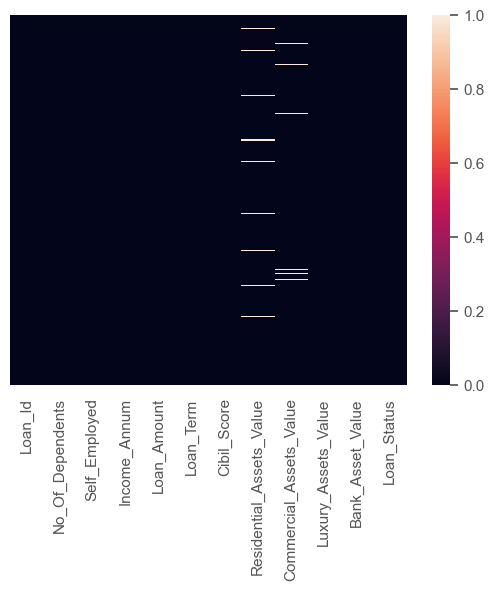

In [16]:
sns.heatmap(df.isnull(), yticklabels=False)

### * Replacing the NaN values with the Mean Values of the Respective Column's

In [17]:
df[('Residential_Assets_Value')] = df[('Residential_Assets_Value')].replace(np.NaN,df.Residential_Assets_Value.mean())
df[('Commercial_Assets_Value')] = df[('Commercial_Assets_Value')].replace(np.NaN,df.Commercial_Assets_Value.mean())
df[('Bank_Asset_Value')] = df[('Bank_Asset_Value')].replace(np.NaN,df.Bank_Asset_Value.mean())

In [18]:
df.head(20)

Loan_Id  No_Of_Dependents Self_Employed  Income_Annum  Loan_Amount  \
0         1                 2            No       9600000     29900000   
1         2                 0           Yes       4100000     12200000   
2         3                 3            No       9100000     29700000   
3         4                 3            No       8200000     30700000   
4         5                 5           Yes       9800000     24200000   
5         6                 0           Yes       4800000     13500000   
6         7                 5            No       8700000     33000000   
7         8                 2           Yes       5700000     15000000   
8         9                 0           Yes        800000      2200000   
9        10                 5            No       1100000      4300000   
10       11                 4           Yes       2900000     11200000   
11       12                 2           Yes       6700000     22700000   
12       13                 3           Yes       5000000     11600000   
13       14                 2           Yes       9100000     31500000   
14       15                 1            No       1900000      7400000   
15       16                 5            No       4700000     10700000   
16       17                 2           Yes        500000      1600000   
17       18                 4           Yes       2900000      9400000   
18       19                 2            No       2700000     10300000   
19       20                 5            No       6300000     14600000   

    Loan_Term  Cibil_Score  Residential_Assets_Value  Commercial_Assets_Value  \
0          12          778                 2400000.0             1.760000e+07   
1           8          417                 2700000.0             2.200000e+06   
2          20          506                 7100000.0             4.500000e+06   
3           8          467                18200000.0             3.300000e+06   
4          20          382                12400000.0             8.200000e+06   
5          10          319                 6800000.0             8.300000e+06   
6           4          678                22500000.0             1.480000e+07   
7          20          382                13200000.0             5.700000e+06   
8          20          782                 1300000.0             8.000000e+05   
9          10          388                 3200000.0             1.400000e+06   
10          2          547                 8100000.0             4.700000e+06   
11         18          538                15300000.0             5.800000e+06   
12         16          311                 6400000.0             9.600000e+06   
13         14          679                10800000.0             1.660000e+07   
14          6          469                 1900000.0             1.200000e+06   
15         10          794                 5700000.0             3.900000e+06   
16          4          663                 1300000.0             1.000000e+05   
17         14          780                 2900000.0             2.800000e+06   
18         10          736                 1000000.0             5.101009e+06   
19         12          652                10300000.0             3.500000e+06   

    Luxury_Assets_Value  Bank_Asset_Value  Loan_Status  
0              22700000         8000000.0            1  
1               8800000         3300000.0            0  
2              33300000        12800000.0            0  
3              23300000         7900000.0            0  
4              29400000         5000000.0            0  
5              13700000         5100000.0            0  
6              29200000         4300000.0            1  
7              11800000         6000000.0            0  
8               2800000          600000.0            1  
9               3300000         1600000.0            0  
10              9500000         3100000.0            1  
11             20400000         6400000.0            0  
12    

In [19]:
df.isnull().sum()

Loan_Id                     0
No_Of_Dependents            0
Self_Employed               0
Income_Annum                0
Loan_Amount                 0
Loan_Term                   0
Cibil_Score                 0
Residential_Assets_Value    0
Commercial_Assets_Value     0
Luxury_Assets_Value         0
Bank_Asset_Value            0
Loan_Status                 0
dtype: int64

<Axes: >

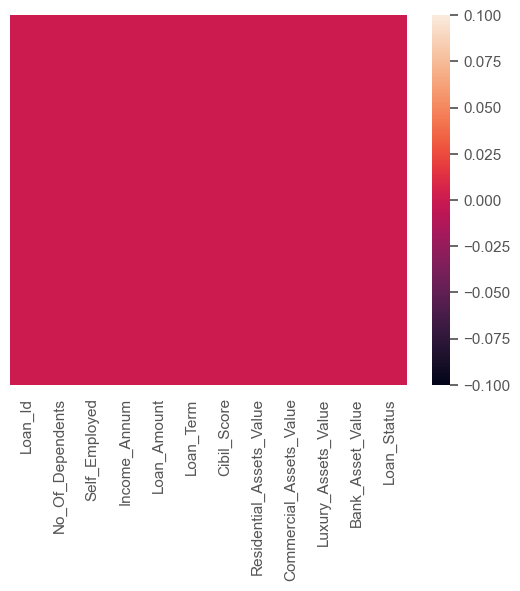

In [20]:
sns.heatmap(df.isnull(), yticklabels=False)

In [21]:
df.columns

Index(['Loan_Id', 'No_Of_Dependents', 'Self_Employed', 'Income_Annum',
       'Loan_Amount', 'Loan_Term', 'Cibil_Score', 'Residential_Assets_Value',
       'Commercial_Assets_Value', 'Luxury_Assets_Value', 'Bank_Asset_Value',
       'Loan_Status'],
      dtype='object')

In [22]:
print(df.dtypes)

Loan_Id                       int64
No_Of_Dependents              int64
Self_Employed                object
Income_Annum                  int64
Loan_Amount                   int64
Loan_Term                     int64
Cibil_Score                   int64
Residential_Assets_Value    float64
Commercial_Assets_Value     float64
Luxury_Assets_Value           int64
Bank_Asset_Value            float64
Loan_Status                   int64
dtype: object


### * Identifying the Outliers and Removing them using Interquartile ranges and Viewing them with BoxPlot

In [23]:
for feature in df.select_dtypes(include=['number']):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    if (df[feature] > upper).any():
        print(feature, "yes")
    else:
        print(feature, "no")

Loan_Id no
No_Of_Dependents no
Income_Annum no
Loan_Amount no
Loan_Term no
Cibil_Score no
Residential_Assets_Value yes
Commercial_Assets_Value yes
Luxury_Assets_Value no
Bank_Asset_Value yes
Loan_Status no


<Axes: xlabel='Residential_Assets_Value'>

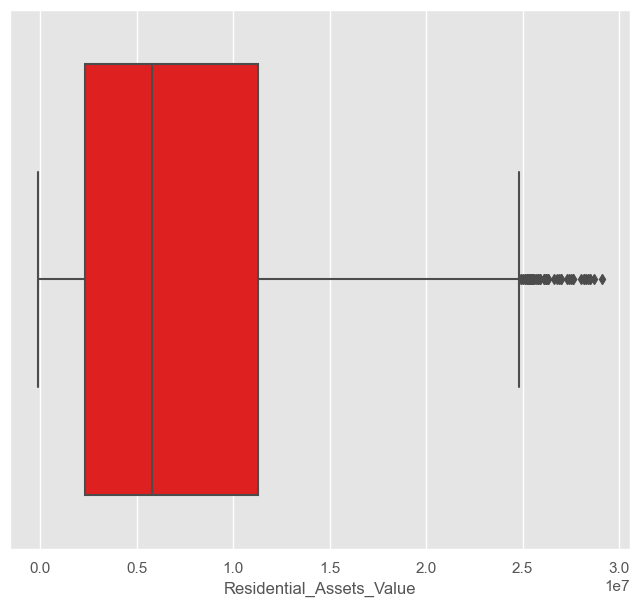

In [24]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Residential_Assets_Value"], color="red")

<Axes: xlabel='Residential_Assets_Value'>

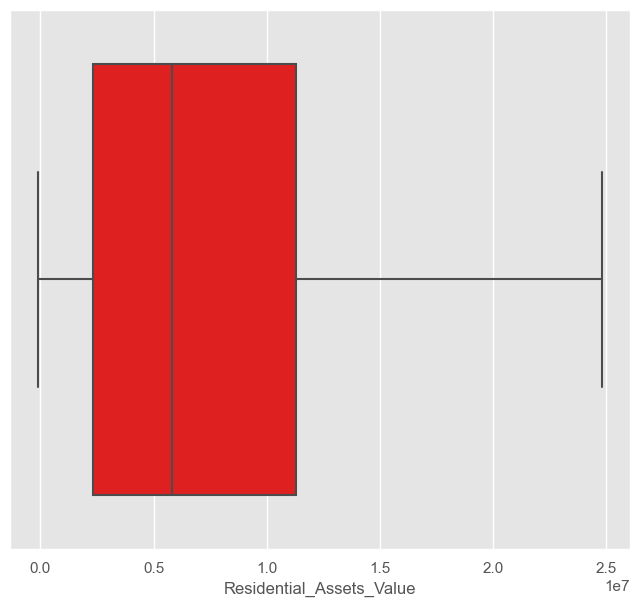

In [25]:
Q1 = df.Residential_Assets_Value.quantile(0.25)
Q3 = df.Residential_Assets_Value.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Residential_Assets_Value']>upper, "Residential_Assets_Value"] = upper
df.loc[df['Residential_Assets_Value']<lower, "Residential_Assets_Value"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Residential_Assets_Value"], color="red")

<Axes: xlabel='Commercial_Assets_Value'>

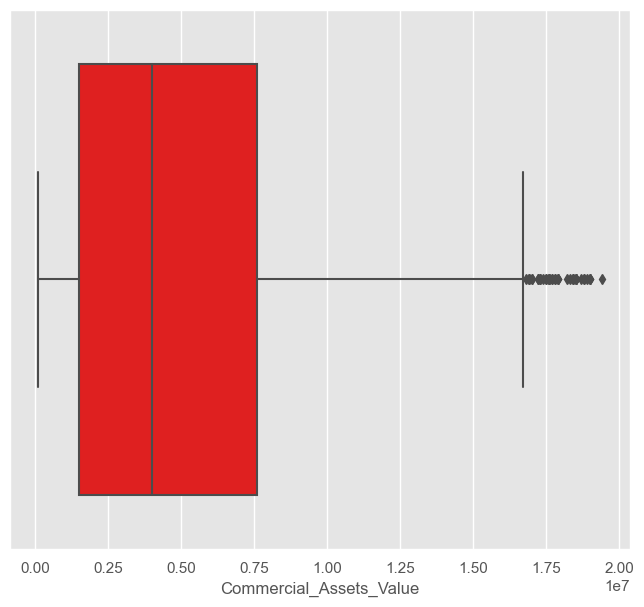

In [26]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Commercial_Assets_Value"], color="red")

<Axes: xlabel='Commercial_Assets_Value'>

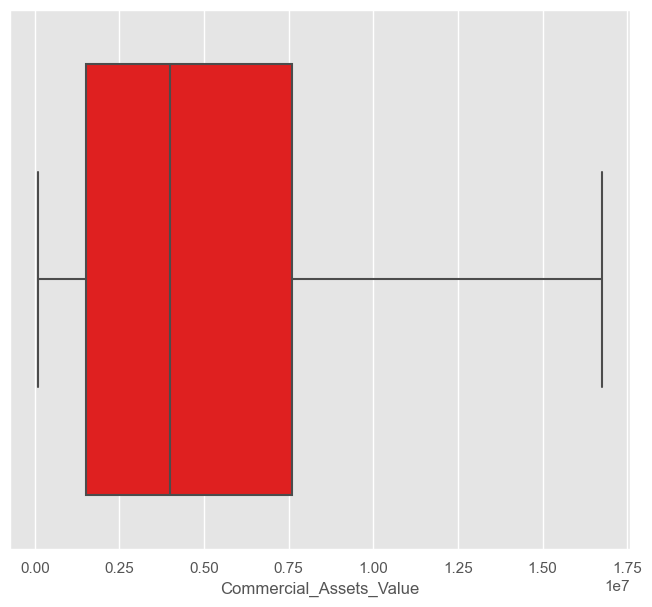

In [27]:
Q1 = df.Commercial_Assets_Value.quantile(0.25)
Q3 = df.Commercial_Assets_Value.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Commercial_Assets_Value']>upper, "Commercial_Assets_Value"] = upper
df.loc[df['Commercial_Assets_Value']<lower, "Commercial_Assets_Value"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Commercial_Assets_Value"], color="red")

<Axes: xlabel='Bank_Asset_Value'>

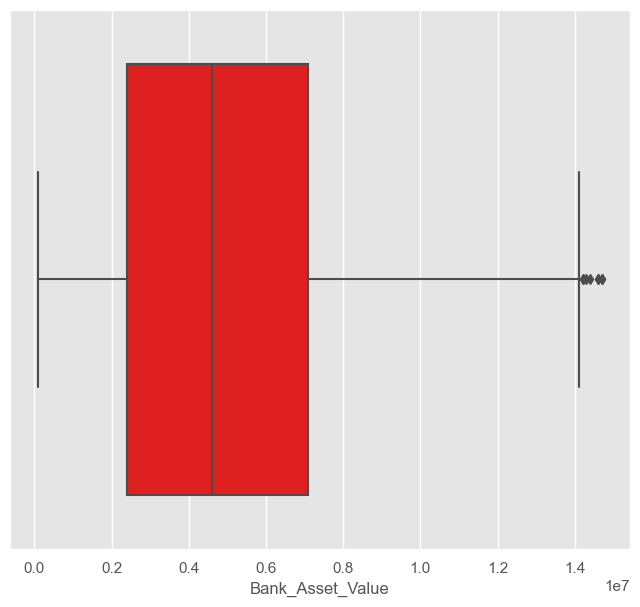

In [28]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Bank_Asset_Value"], color="red")

<Axes: xlabel='Bank_Asset_Value'>

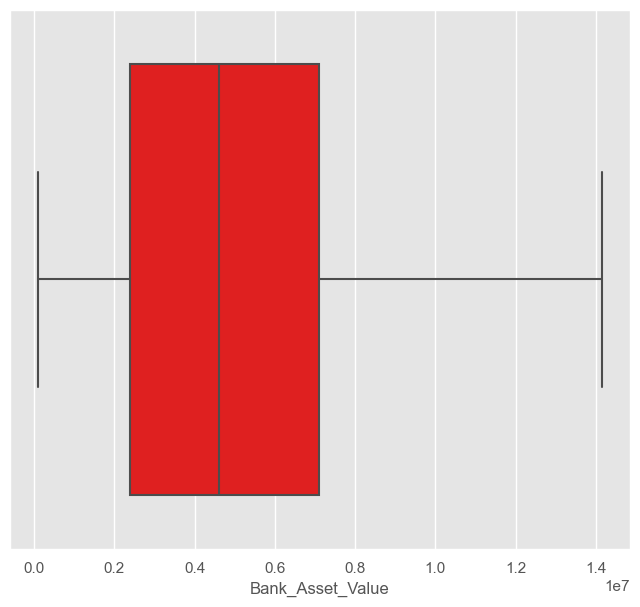

In [29]:
Q1 = df.Bank_Asset_Value.quantile(0.25)
Q3 = df.Bank_Asset_Value.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Bank_Asset_Value']>upper, "Bank_Asset_Value"] = upper
df.loc[df['Bank_Asset_Value']<lower, "Bank_Asset_Value"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Bank_Asset_Value"], color="red")

## * Visualising Data using various Graphs

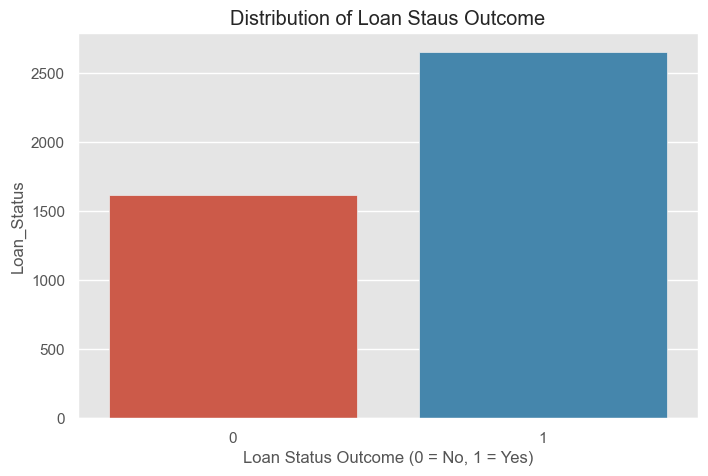

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Staus Outcome')
plt.xlabel('Loan Status Outcome (0 = No, 1 = Yes)')
plt.ylabel('Loan_Status')
plt.show()

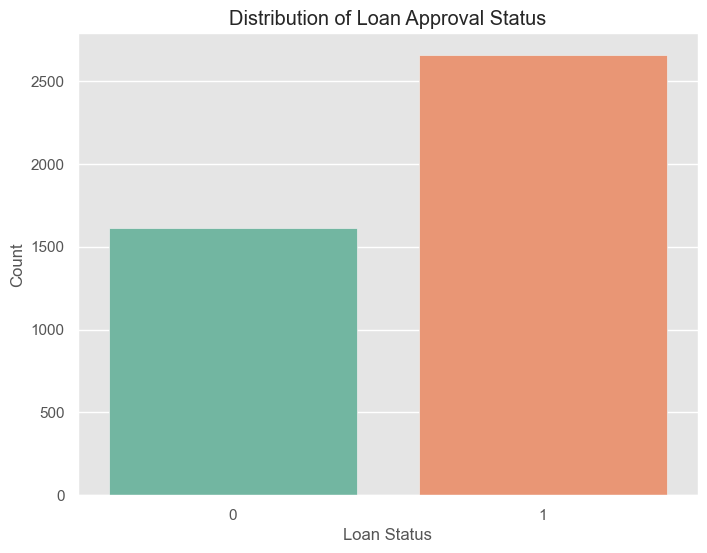

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot 1: Loan Approval Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

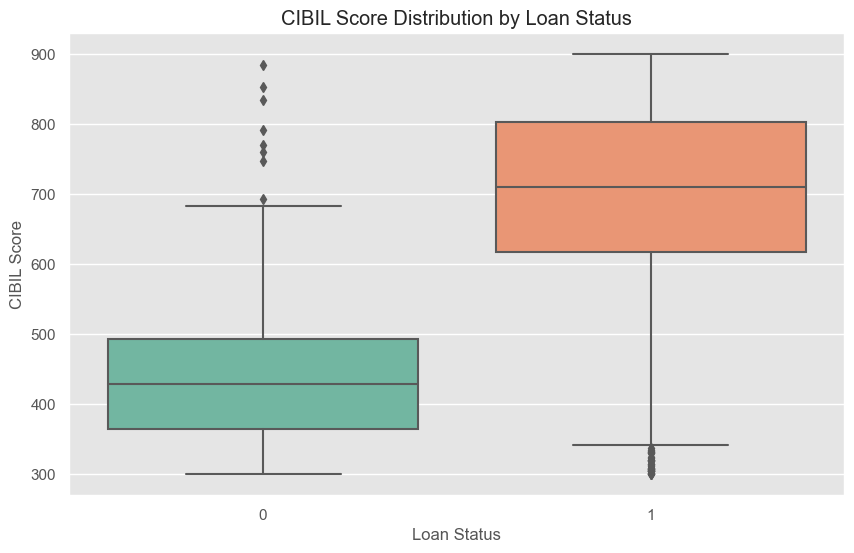

In [32]:
# Plot 2: CIBIL Score Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='Cibil_Score', data=df, palette='Set2')
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

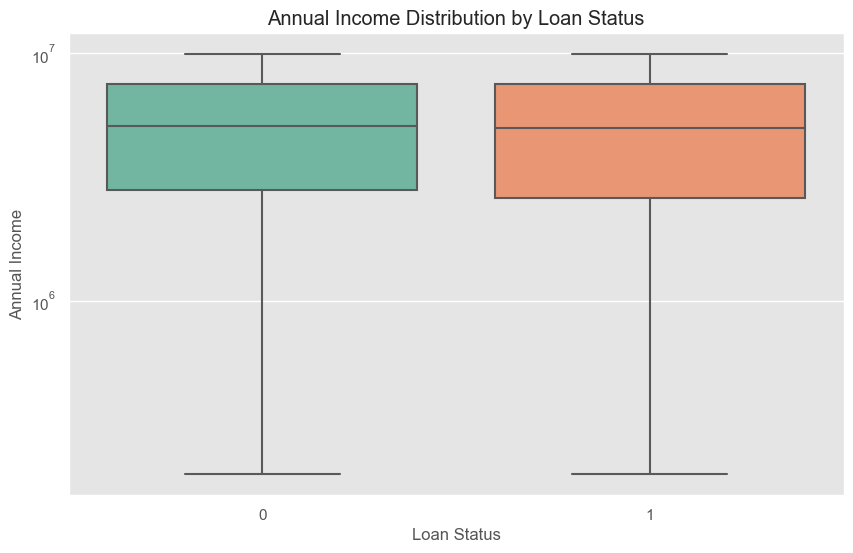

In [33]:
# Plot 3: Income Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='Income_Annum', data=df, palette='Set2')
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

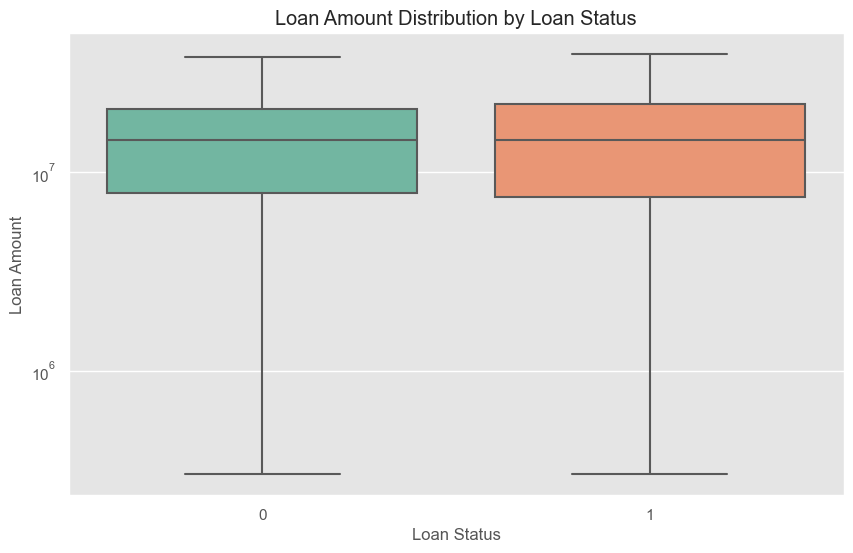

In [34]:
# Plot 4: Loan Amount Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='Loan_Amount', data=df, palette='Set2')
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

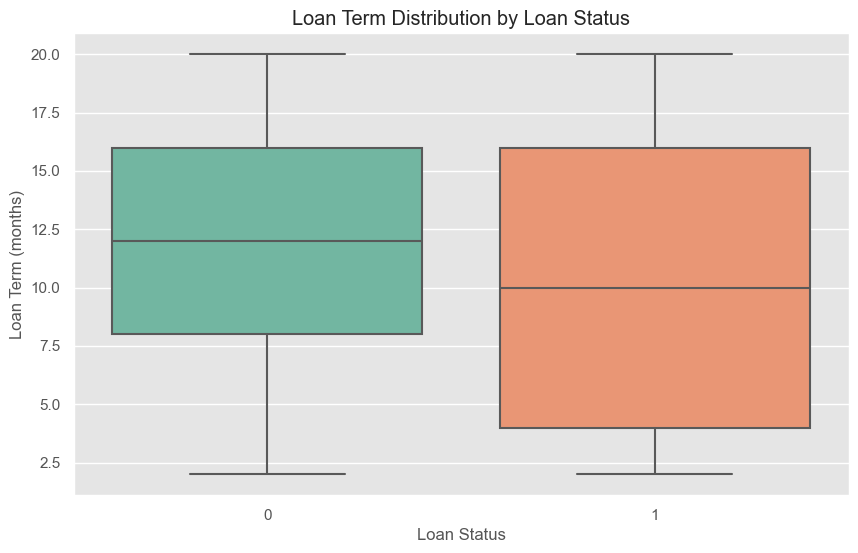

In [35]:
# Plot 4: Loan Term Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='Loan_Term', data=df, palette='Set2')
plt.title('Loan Term Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Term (months)')
plt.show()

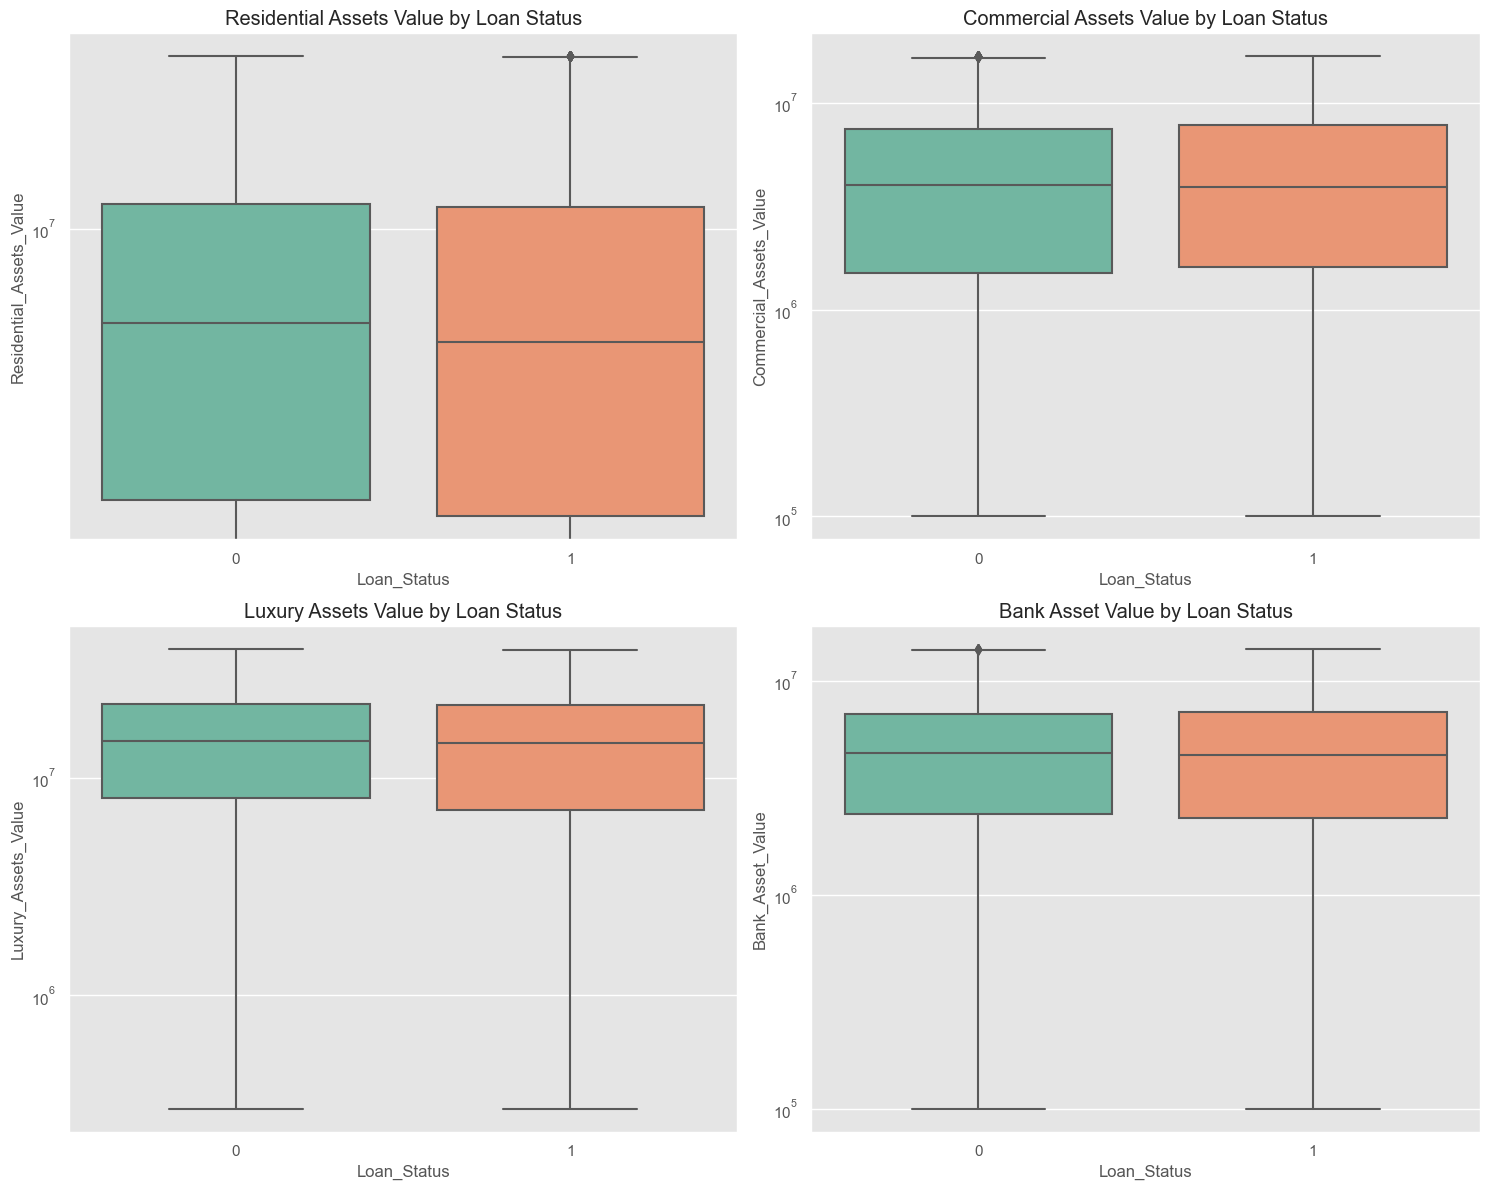

In [36]:
# Plot 5: Asset Values Comparison by Loan Status
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

asset_columns = ['Residential_Assets_Value', 'Commercial_Assets_Value', 
                 'Luxury_Assets_Value', 'Bank_Asset_Value']

for i, col in enumerate(asset_columns):
    ax = axes[i//2, i%2]
    sns.boxplot(x='Loan_Status', y=col, data=df, ax=ax, palette='Set2')
    ax.set_title(f'{col.replace("_", " ").title()} by Loan Status')
    ax.set_yscale('log')
    
plt.tight_layout()
plt.show()

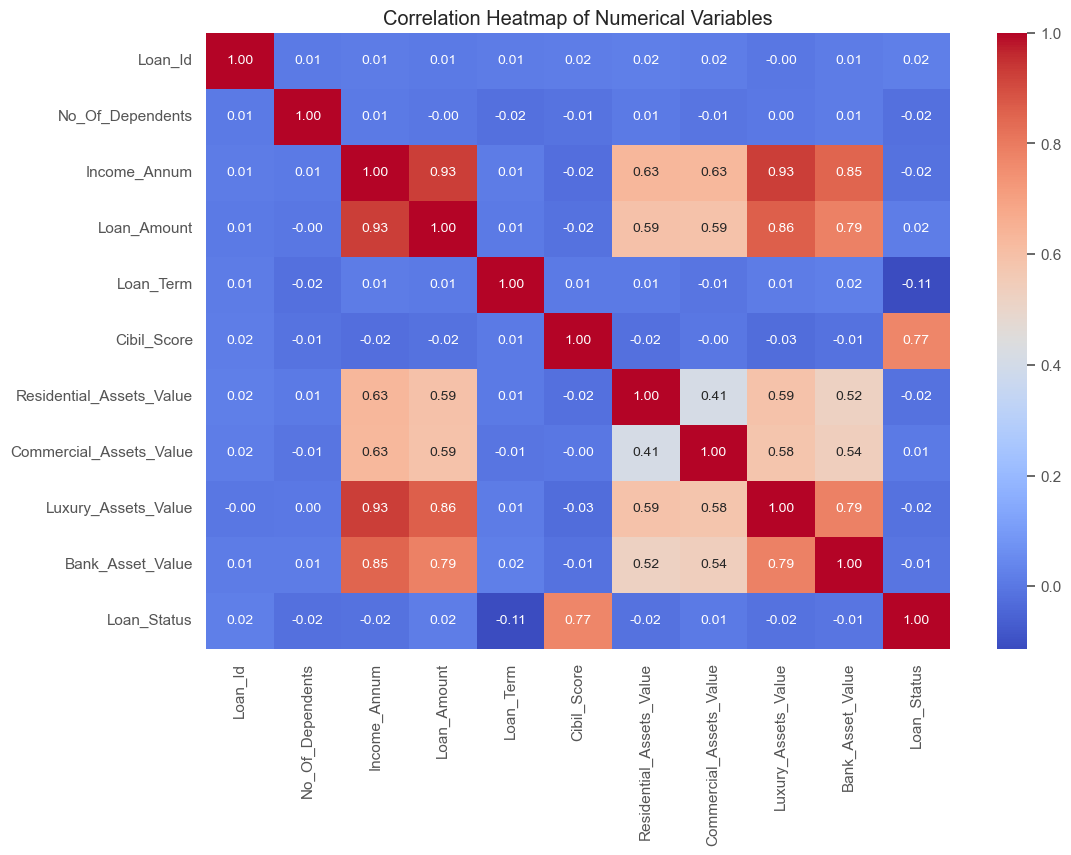

In [37]:
# Plot 6: Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

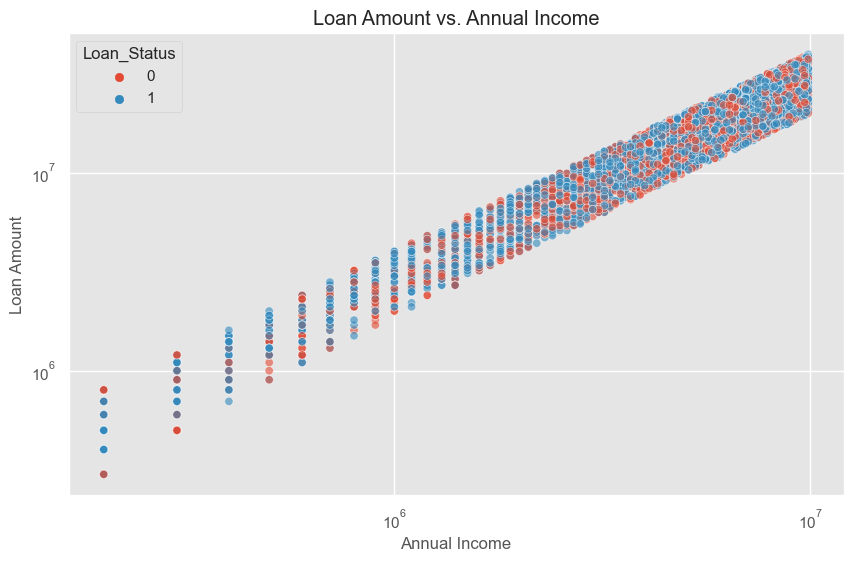

In [38]:
# Plot 7: Loan Amount vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income_Annum', y='Loan_Amount', hue='Loan_Status', data=df, alpha=0.6)
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.xscale('log')
plt.yscale('log')
plt.show()

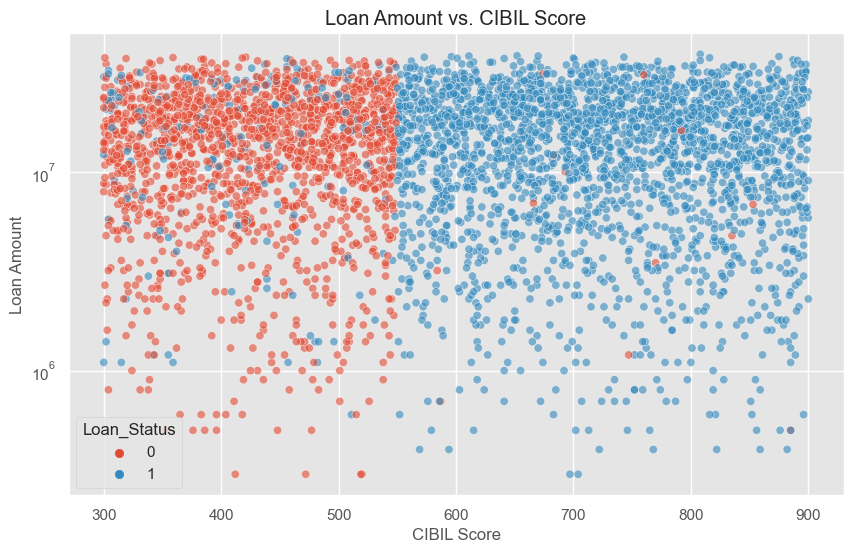

In [39]:
# Plot 8: CIBIL Score vs. Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cibil_Score', y='Loan_Amount', hue='Loan_Status', data=df, alpha=0.6)
plt.title('Loan Amount vs. CIBIL Score')
plt.xlabel('CIBIL Score')
plt.ylabel('Loan Amount')
plt.yscale('log')
plt.show()

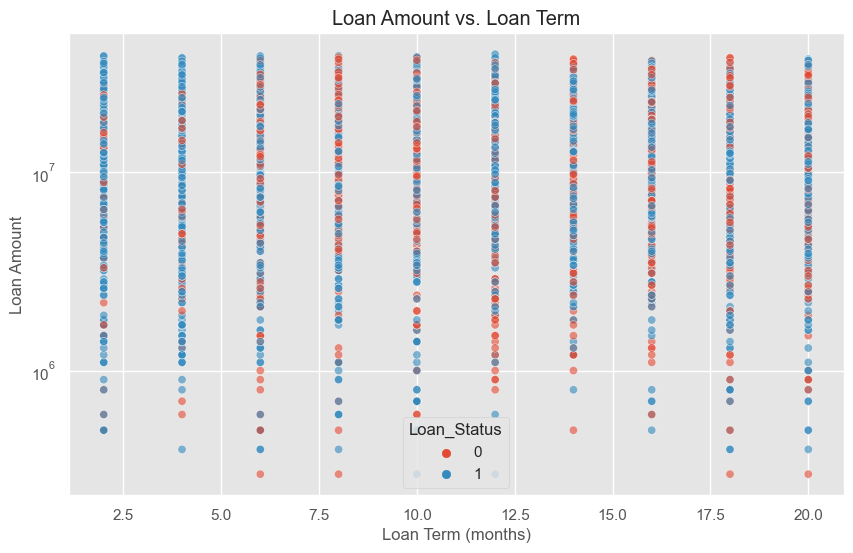

In [40]:
# Plot 9: Loan Term vs. Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loan_Term',y='Loan_Amount', hue='Loan_Status', data=df, alpha=0.6)
plt.title('Loan Amount vs. Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Loan Amount')
plt.yscale('log')
plt.show()

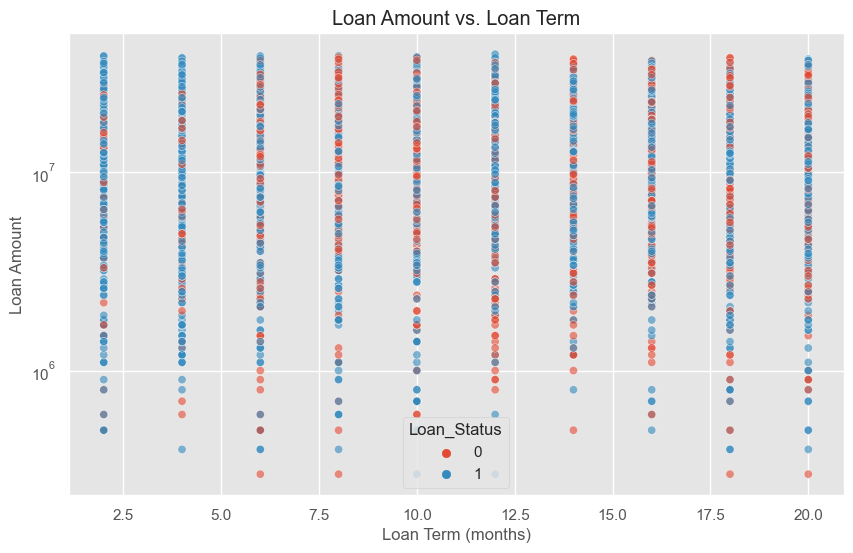

In [41]:
# Plot 10: Loan Term vs. Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loan_Term', y='Loan_Amount', hue='Loan_Status', data=df, alpha=0.6)
plt.title('Loan Amount vs. Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Loan Amount')
plt.yscale('log')
plt.show()

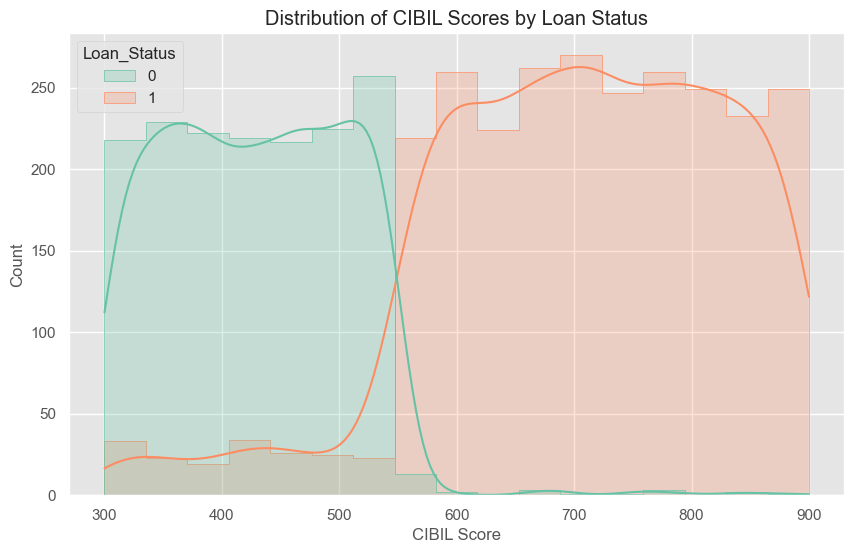

In [42]:
# Plot 11: Distribution of CIBIL Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cibil_Score', hue='Loan_Status', kde=True, element='step', palette='Set2')
plt.title('Distribution of CIBIL Scores by Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.show()

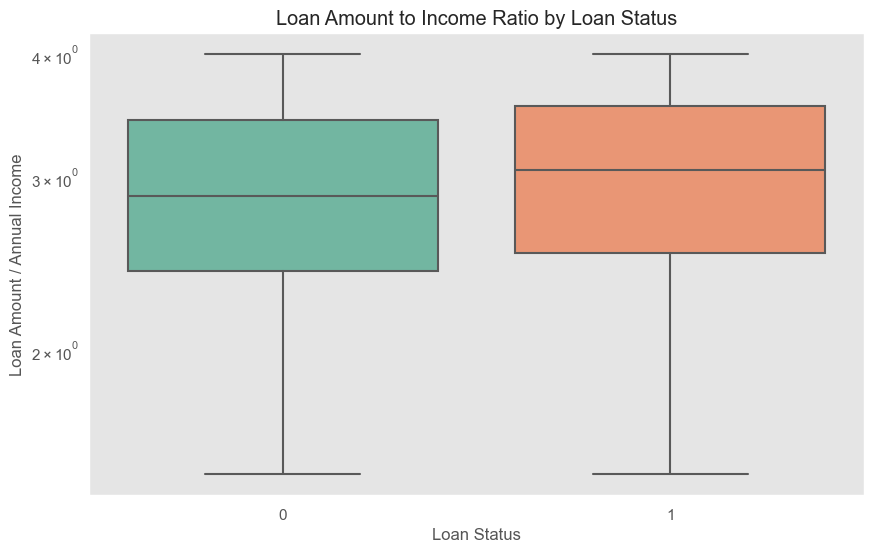

In [43]:
# Plot 12: Loan Amount to Income Ratio
df['loan_to_income'] = df['Loan_Amount'] / df['Income_Annum']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='loan_to_income', data=df, palette='Set2')
plt.title('Loan Amount to Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount / Annual Income')
plt.yscale('log')
plt.show()

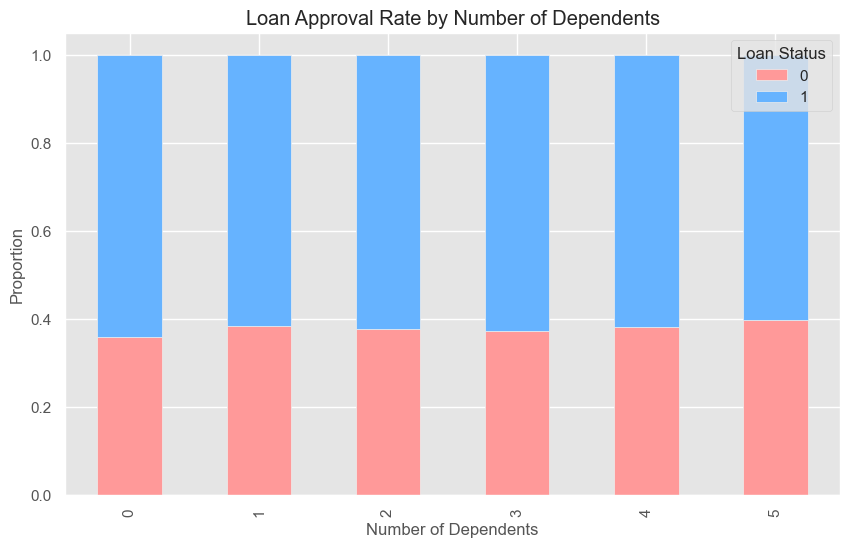

In [44]:
# Plot 13: Approval Rates by Number of Dependents
approval_rate = df.groupby('No_Of_Dependents')['Loan_Status'].value_counts(normalize=True).unstack()
approval_rate.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999','#66b3ff'])
plt.title('Loan Approval Rate by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')
plt.show()

<Figure size 1000x600 with 0 Axes>

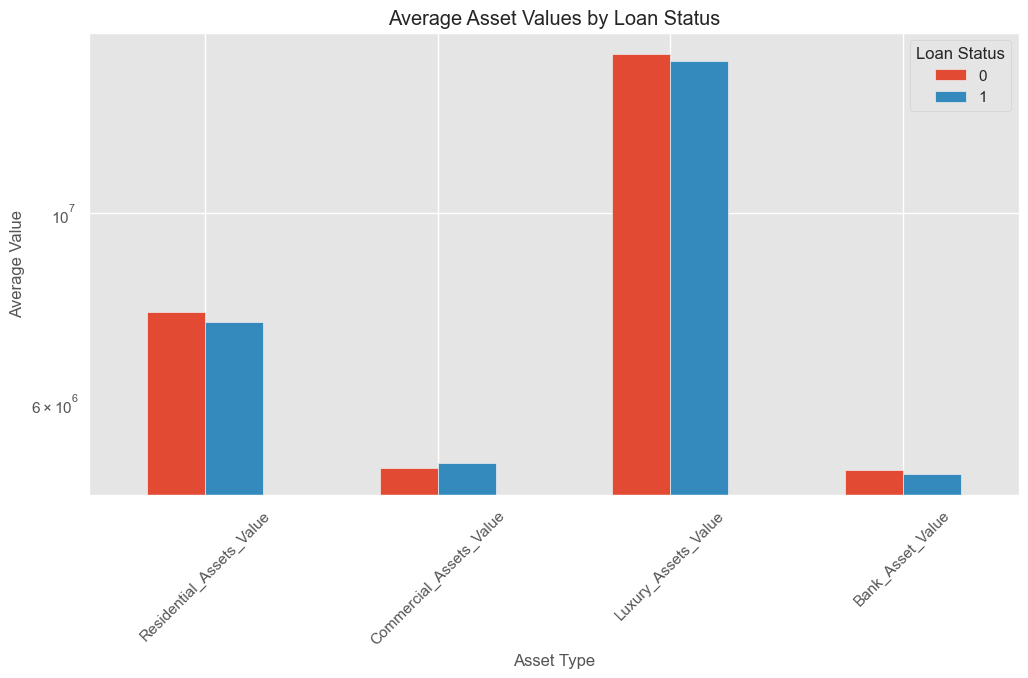

In [45]:
# Plot 14: Asset Composition by Loan Status
asset_cols = ['Residential_Assets_Value', 'Commercial_Assets_Value', 'Luxury_Assets_Value', 'Bank_Asset_Value']
asset_totals = df.groupby('Loan_Status')[asset_cols].mean()

plt.figure(figsize=(10, 6))
asset_totals.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Asset Values by Loan Status')
plt.xlabel('Asset Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(title='Loan Status')
plt.show()

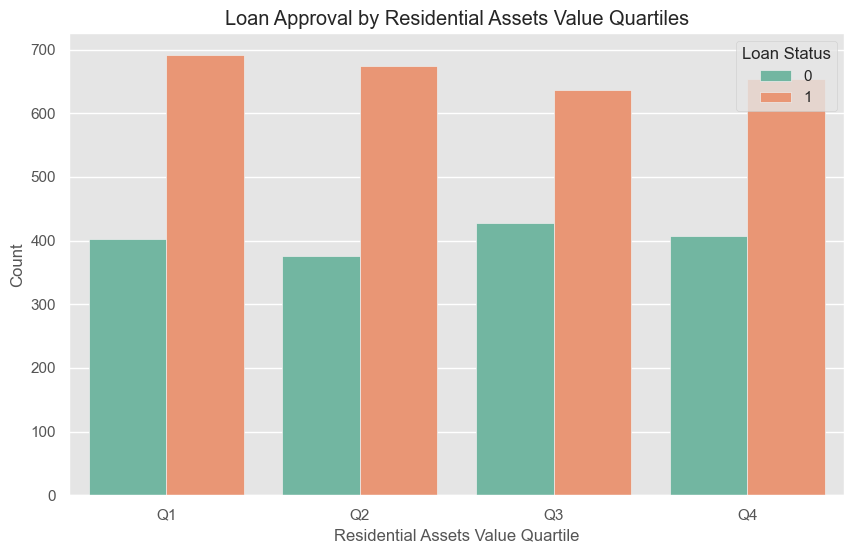

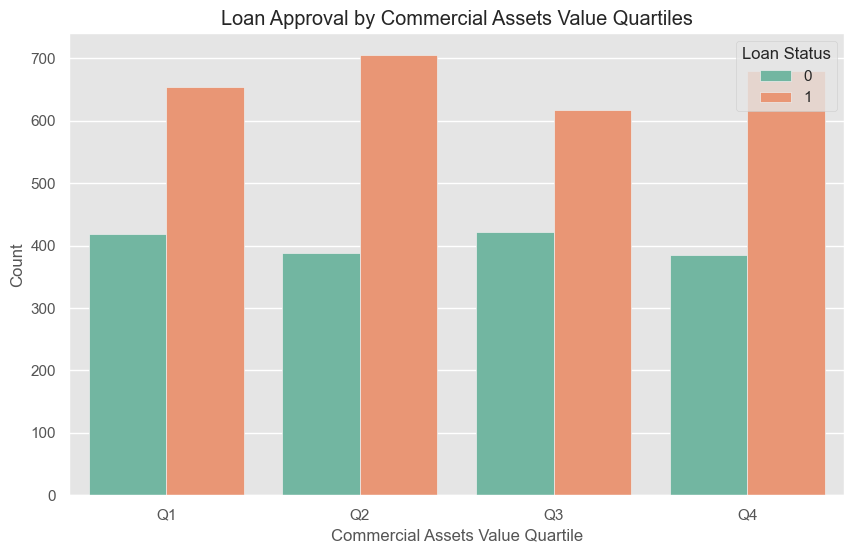

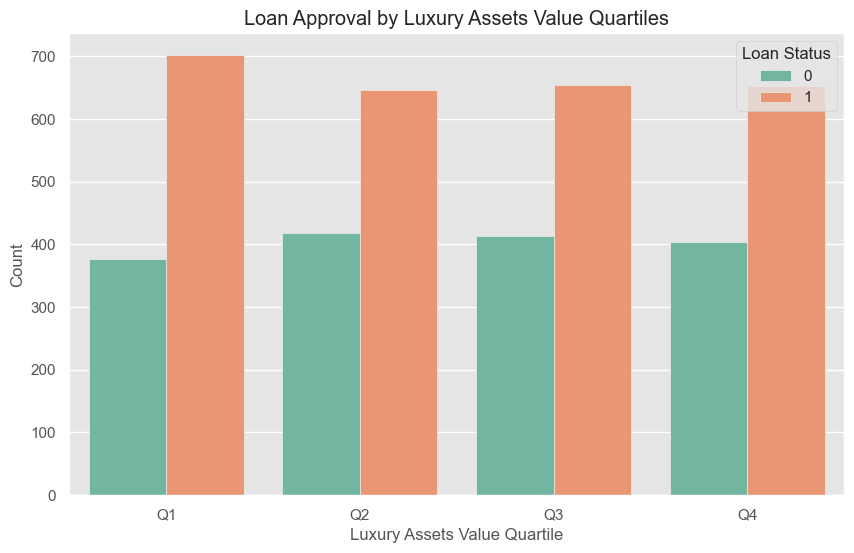

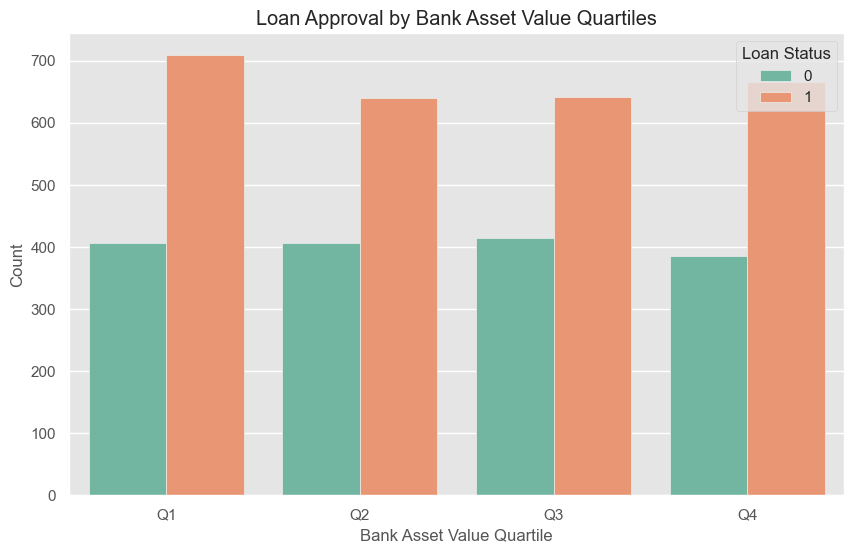

In [46]:
# Plot 15: Loan Approval by Asset Quartiles
for asset in ['Residential_Assets_Value', 'Commercial_Assets_Value', 'Luxury_Assets_Value', 'Bank_Asset_Value']:
    df[f'{asset}_quartile'] = pd.qcut(df[asset], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=f'{asset}_quartile', hue='Loan_Status', data=df, palette='Set2')
    plt.title(f'Loan Approval by {asset.replace("_", " ").title()} Quartiles')
    plt.xlabel(f'{asset.replace("_", " ").title()} Quartile')
    plt.ylabel('Count')
    plt.legend(title='Loan Status')
    plt.show()

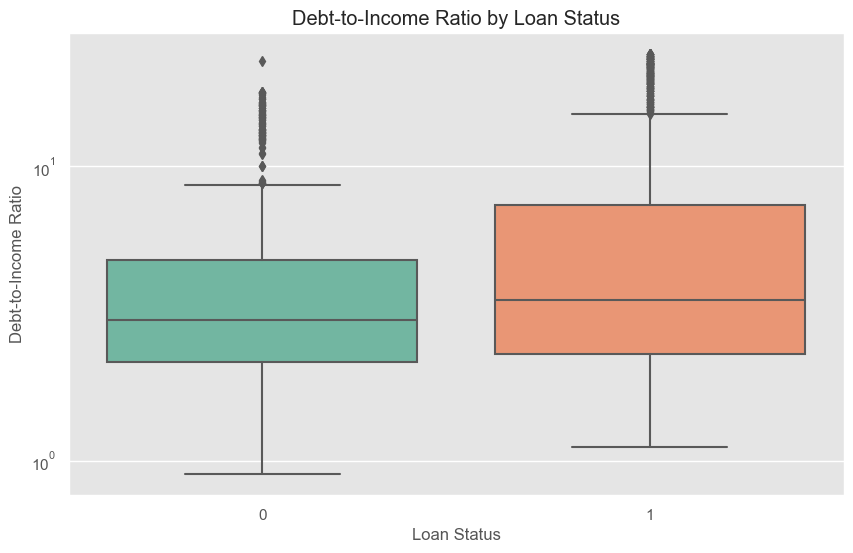

In [47]:
# Plot 16: Debt-to-Income Ratio Analysis
df['dti'] = df['Loan_Amount'] / (df['Income_Annum'] * df['Loan_Term']/12)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='dti', data=df, palette='Set2')
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.yscale('log')
plt.show()

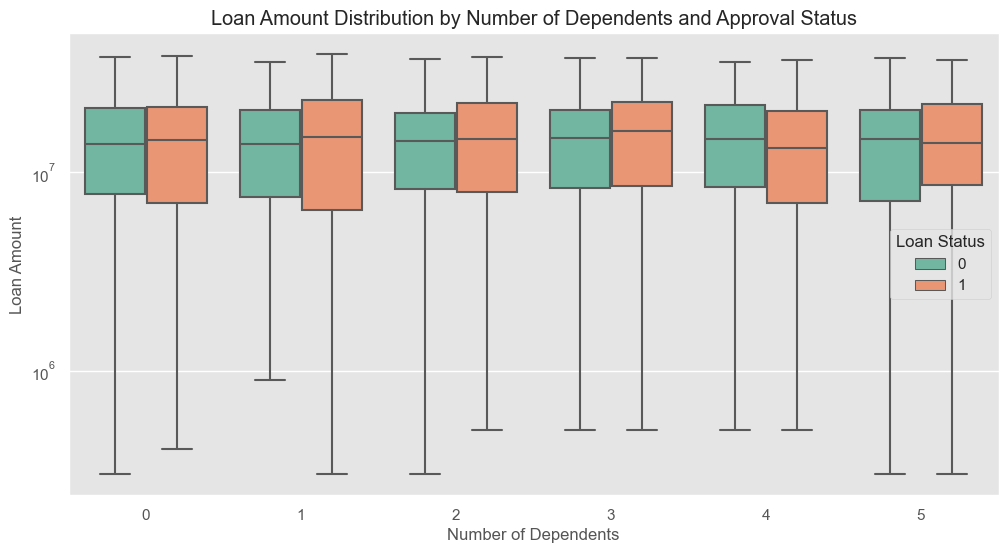

In [48]:
# Plot 17: Loan Amount Distribution by Number of Dependents
plt.figure(figsize=(12, 6))
sns.boxplot(x='No_Of_Dependents', y='Loan_Amount', hue='Loan_Status', data=df, palette='Set2')
plt.title('Loan Amount Distribution by Number of Dependents and Approval Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Loan Amount')
plt.yscale('log')
plt.legend(title='Loan Status')
plt.show()

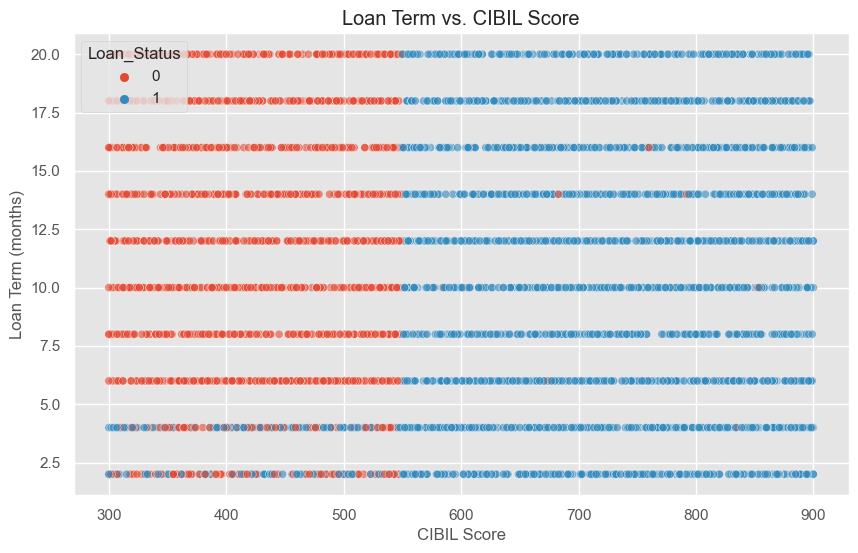

In [49]:
# Plot 18: CIBIL Score vs. Loan Term
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cibil_Score', y='Loan_Term', hue='Loan_Status', data=df, alpha=0.6)
plt.title('Loan Term vs. CIBIL Score')
plt.xlabel('CIBIL Score')
plt.ylabel('Loan Term (months)')
plt.show()

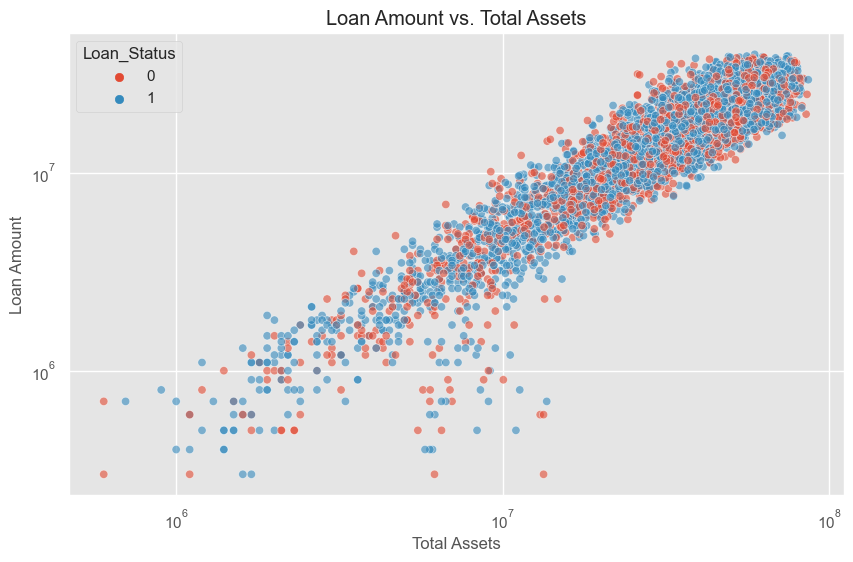

In [50]:
# Plot 19: Total Assets vs. Loan Amount
df['Total_Assets'] = df['Residential_Assets_Value'] + df['Commercial_Assets_Value'] + df['Luxury_Assets_Value'] + df['Bank_Asset_Value']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Assets', y='Loan_Amount', hue='Loan_Status', data=df, alpha=0.6)
plt.title('Loan Amount vs. Total Assets')
plt.xlabel('Total Assets')
plt.ylabel('Loan Amount')
plt.xscale('log')
plt.yscale('log')
plt.show()

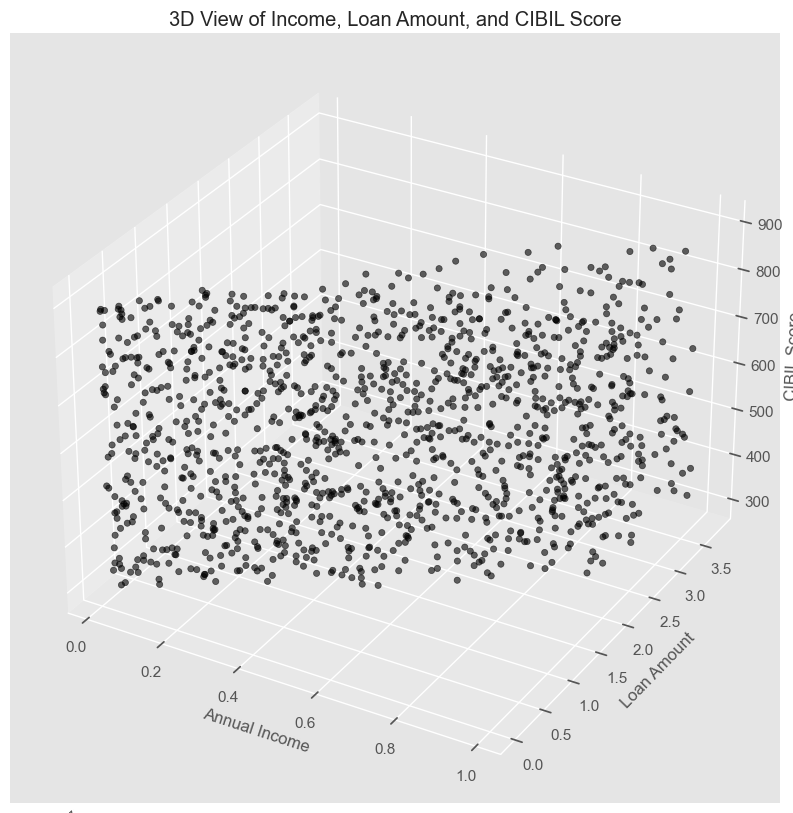

In [51]:
# Plot 20: Interactive 3D Plot of Income, Loan Amount, and CIBIL Score
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Sample a fraction of the data for better visualization
sample_df = df.sample(frac=0.3)

x = sample_df['Income_Annum']
y = sample_df['Loan_Amount']
z = sample_df['Cibil_Score']
c = sample_df['Loan_Status'].map({'Approved': 'green', 'Rejected': 'red'})

ax.scatter(x, y, z, c=c, alpha=0.6)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Loan Amount')
ax.set_zlabel('CIBIL Score')
ax.set_title('3D View of Income, Loan Amount, and CIBIL Score')
plt.show()

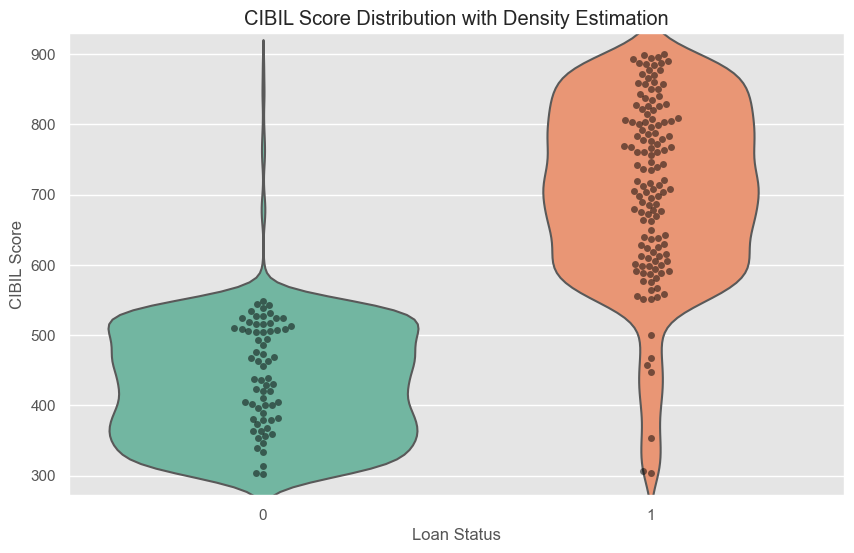

In [52]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Loan_Status', y='Cibil_Score', data=df, inner=None, palette='Set2')
sns.swarmplot(x='Loan_Status', y='Cibil_Score', data=df.sample(200), color='black', alpha=0.5)
plt.title('CIBIL Score Distribution with Density Estimation')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

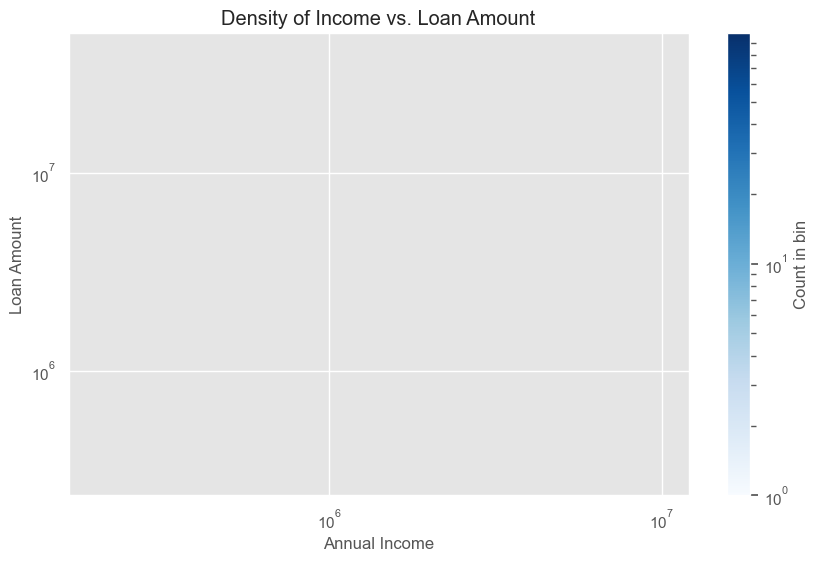

In [53]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Income_Annum'], df['Loan_Amount'], gridsize=30, cmap='Blues', bins='log')
plt.colorbar(label='Count in bin')
plt.title('Density of Income vs. Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.xscale('log')
plt.yscale('log')
plt.show()

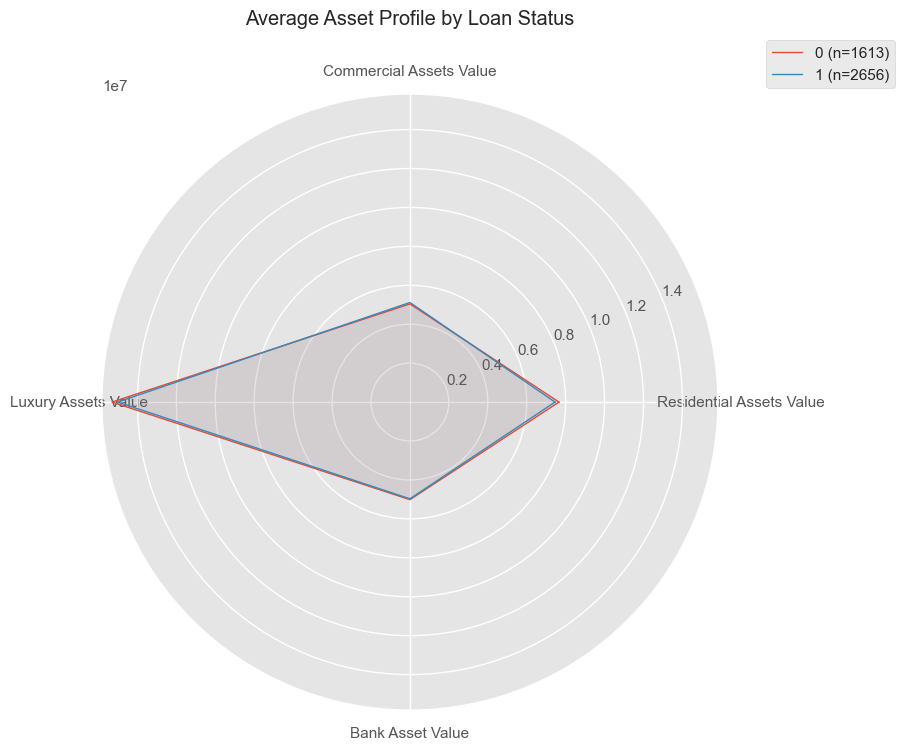

In [54]:
from math import pi

# Prepare data
asset_cols = ['Residential_Assets_Value', 'Commercial_Assets_Value', 
              'Luxury_Assets_Value', 'Bank_Asset_Value']
stats = df.groupby('Loan_Status')[asset_cols].mean().reset_index()

# Number of variables
categories = [col.replace('_', ' ').title() for col in asset_cols]
N = len(categories)

# Create radar chart
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for i, status in enumerate(stats['Loan_Status']):
    values = stats.loc[stats['Loan_Status'] == status, asset_cols].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', 
            label=f"{status} (n={len(df[df['Loan_Status']==status])})")
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.title('Average Asset Profile by Loan Status', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

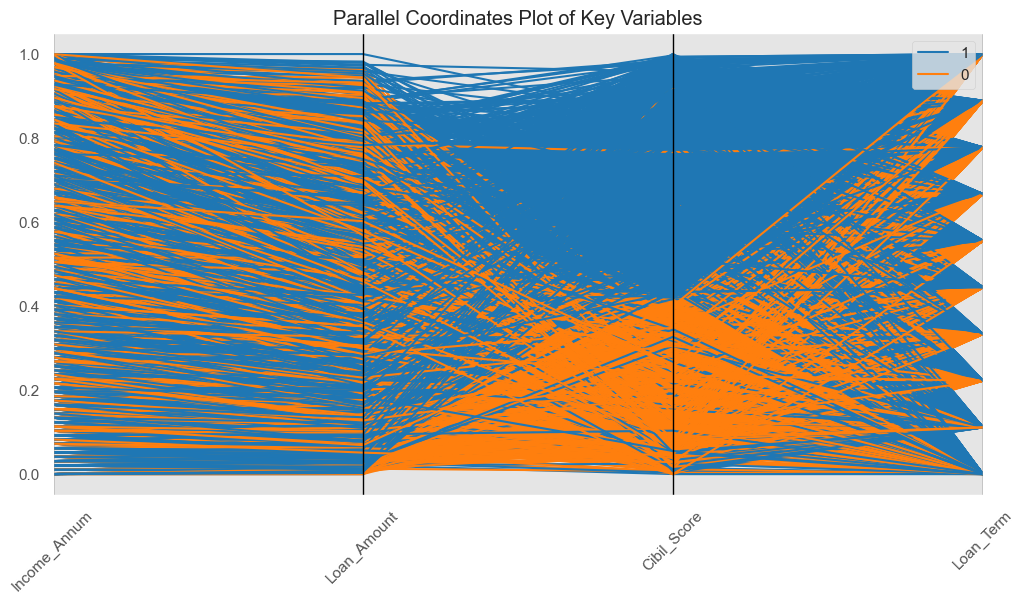

In [55]:
from pandas.plotting import parallel_coordinates

# Prepare data with normalized values
parallel_df = df[['Loan_Status', 'Income_Annum', 'Loan_Amount', 'Cibil_Score', 'Loan_Term']].copy()
for col in ['Income_Annum', 'Loan_Amount', 'Cibil_Score', 'Loan_Term']:
    parallel_df[col] = (parallel_df[col] - parallel_df[col].min()) / (parallel_df[col].max() - parallel_df[col].min())

plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_df, 'Loan_Status', color=['#1f77b4', '#ff7f0e'])
plt.title('Parallel Coordinates Plot of Key Variables')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

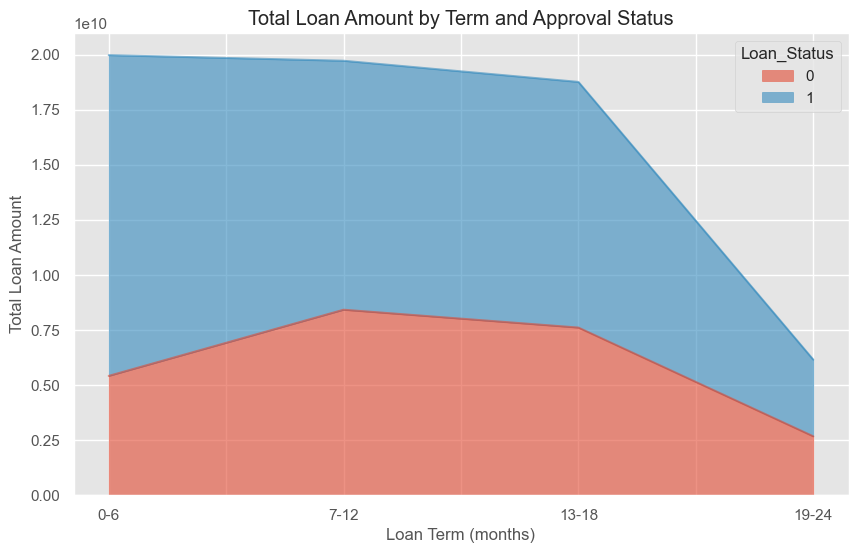

In [56]:
# Create bins for loan term
df['term_bin'] = pd.cut(df['Loan_Term'], bins=[0, 6, 12, 18, 24], 
                        labels=['0-6', '7-12', '13-18', '19-24'])

# Prepare data
stacked_data = df.groupby(['term_bin', 'Loan_Status'])['Loan_Amount'].sum().unstack()

plt.figure(figsize=(10, 6))
stacked_data.plot(kind='area', stacked=True, alpha=0.6, figsize=(10, 6))
plt.title('Total Loan Amount by Term and Approval Status')
plt.xlabel('Loan Term (months)')
plt.ylabel('Total Loan Amount')
plt.show()

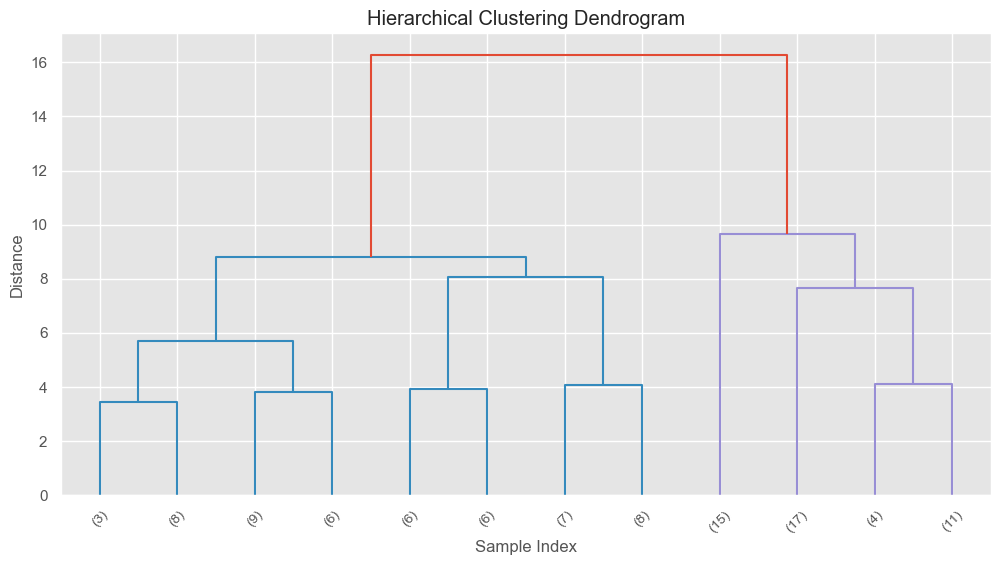

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
cluster_df = df[['Income_Annum', 'Loan_Amount', 'Cibil_Score', 'Loan_Term']]
cluster_df = cluster_df.sample(100)  # Sample for performance
cluster_df = StandardScaler().fit_transform(cluster_df)

# Perform hierarchical clustering
Z = linkage(cluster_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

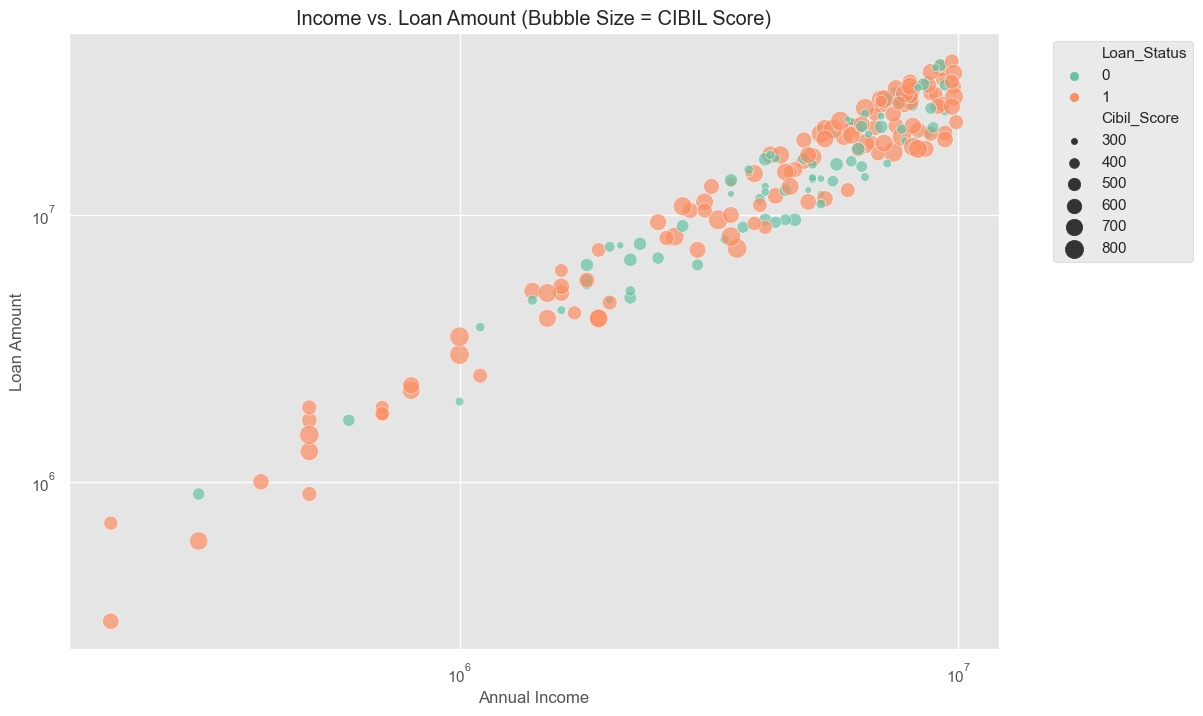

In [58]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income_Annum', y='Loan_Amount', size='Cibil_Score', 
                hue='Loan_Status', data=df.sample(200), 
                sizes=(20, 200), alpha=0.7, palette='Set2')
plt.title('Income vs. Loan Amount (Bubble Size = CIBIL Score)')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [59]:
df.head()

Loan_Id  No_Of_Dependents Self_Employed  Income_Annum  Loan_Amount  \
0        1                 2            No       9600000     29900000   
1        2                 0           Yes       4100000     12200000   
2        3                 3            No       9100000     29700000   
3        4                 3            No       8200000     30700000   
4        5                 5           Yes       9800000     24200000   

   Loan_Term  Cibil_Score  Residential_Assets_Value  Commercial_Assets_Value  \
0         12          778                 2400000.0               16750000.0   
1          8          417                 2700000.0                2200000.0   
2         20          506                 7100000.0                4500000.0   
3          8          467                18200000.0                3300000.0   
4         20          382                12400000.0                8200000.0   

   Luxury_Assets_Value  Bank_Asset_Value  Loan_Status  loan_to_income  \
0             22700000         8000000.0            1        3.114583   
1              8800000         3300000.0            0        2.975610   
2             33300000        12800000.0            0        3.263736   
3             23300000         7900000.0            0        3.743902   
4             29400000         5000000.0            0        2.469388   

  Residential_Assets_Value_quartile Commercial_Assets_Value_quartile  \
0                                Q2                               Q4   
1                                Q2                               Q2   
2                                Q3                               Q3   
3                                Q4                               Q2   
4                                Q4                               Q4   

  Luxury_Assets_Value_quartile Bank_Asset_Value_quartile       dti  \
0                           Q4                        Q4  3.114583   
1                           Q2                        Q2  4.463415   
2                           Q4                        Q4  1.958242   
3                           Q4                        Q4  5.615854   
4                           Q4                        Q3  1.481633   

   Total_Assets term_bin  
0    49850000.0     7-12  
1    17000000.0     7-12  
2    57700000.0    19-24  
3    52700000.0     7-12  
4    55000000.0    19-24

In [60]:
df=df.drop(['Loan_Id','Self_Employed','loan_to_income','Residential_Assets_Value_quartile','Commercial_Assets_Value_quartile','Luxury_Assets_Value_quartile','Bank_Asset_Value_quartile','dti','Total_Assets','term_bin'], axis=1)

In [61]:
 #p = sns.pairplot(df1, hue="Loan_Status")

In [62]:
df1.columns

Index(['Loan_Id', 'No_Of_Dependents', 'Self_Employed', 'Income_Annum',
       'Loan_Amount', 'Loan_Term', 'Cibil_Score', 'Residential_Assets_Value',
       'Commercial_Assets_Value', 'Luxury_Assets_Value', 'Bank_Asset_Value',
       'Loan_Status'],
      dtype='object')

Text(0.5, 0, 'Bank_Asset_Value')

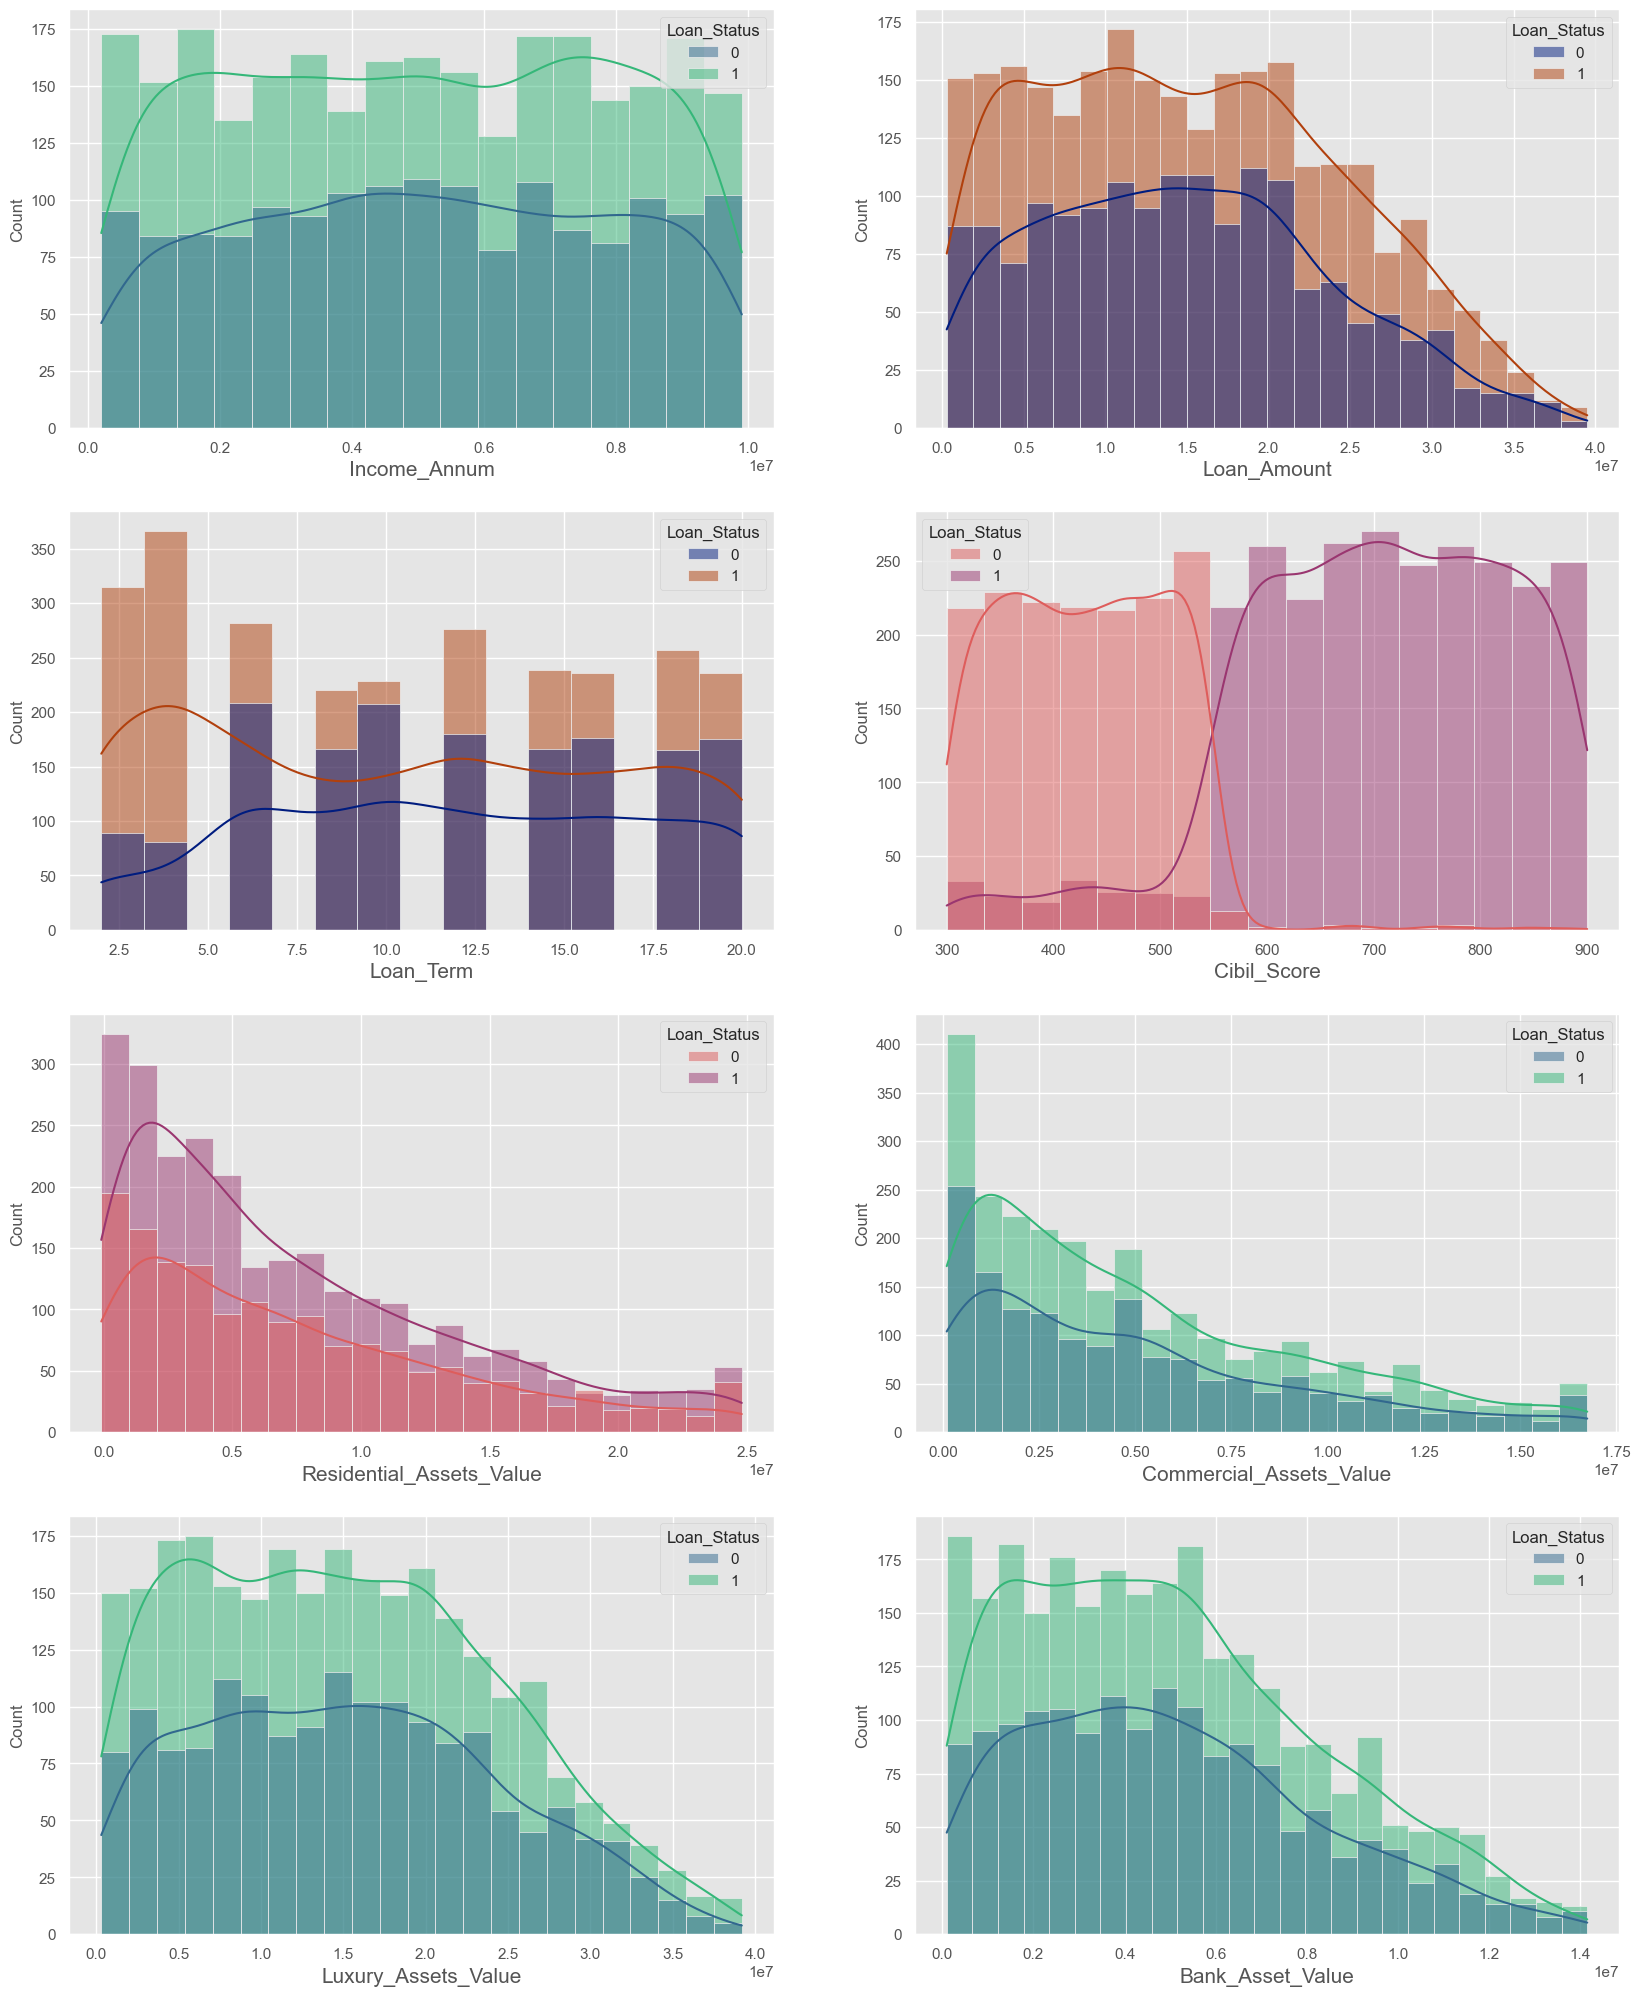

In [63]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))
plt.style.use('ggplot')

sns.histplot(x = df['Income_Annum'], hue = df['Loan_Status'], palette="viridis",kde = True, ax = ax[0, 0])
ax[0,0].set_xlabel('Income_Annum', fontsize = 15)


sns.histplot(x = df['Loan_Amount'], hue = df['Loan_Status'], palette="dark",kde = True, ax = ax[0, 1])
ax[0,1].set_xlabel('Loan_Amount', fontsize = 15)

sns.histplot(x = df['Loan_Term'], hue = df['Loan_Status'], palette="dark",kde = True, ax = ax[1, 0])
ax[1,0].set_xlabel('Loan_Term', fontsize = 15)


sns.histplot(x = df['Cibil_Score'], hue = df['Loan_Status'], palette="flare",kde = True, ax = ax[1, 1])
ax[1,1].set_xlabel('Cibil_Score', fontsize = 15)

sns.histplot(x = df['Residential_Assets_Value'], hue = df['Loan_Status'], palette="flare",kde = True, ax = ax[2, 0])
ax[2,0].set_xlabel('Residential_Assets_Value', fontsize = 15)


sns.histplot(x = df['Commercial_Assets_Value'], hue = df['Loan_Status'], palette="viridis",kde = True, ax = ax[2, 1])
ax[2,1].set_xlabel('Commercial_Assets_Value', fontsize = 15)

sns.histplot(x = df['Luxury_Assets_Value'], hue = df['Loan_Status'], palette="viridis",kde = True, ax = ax[3, 0])
ax[3,0].set_xlabel('Luxury_Assets_Value', fontsize = 15)

sns.histplot(x = df['Bank_Asset_Value'], hue = df['Loan_Status'], palette="viridis",kde = True, ax = ax[3, 1])
ax[3,1].set_xlabel('Bank_Asset_Value', fontsize = 15)


In [64]:
df2=pd.read_csv(r"C:\Users\david\OneDrive\Desktop\loan_approval_dataset.csv")

<Axes: >

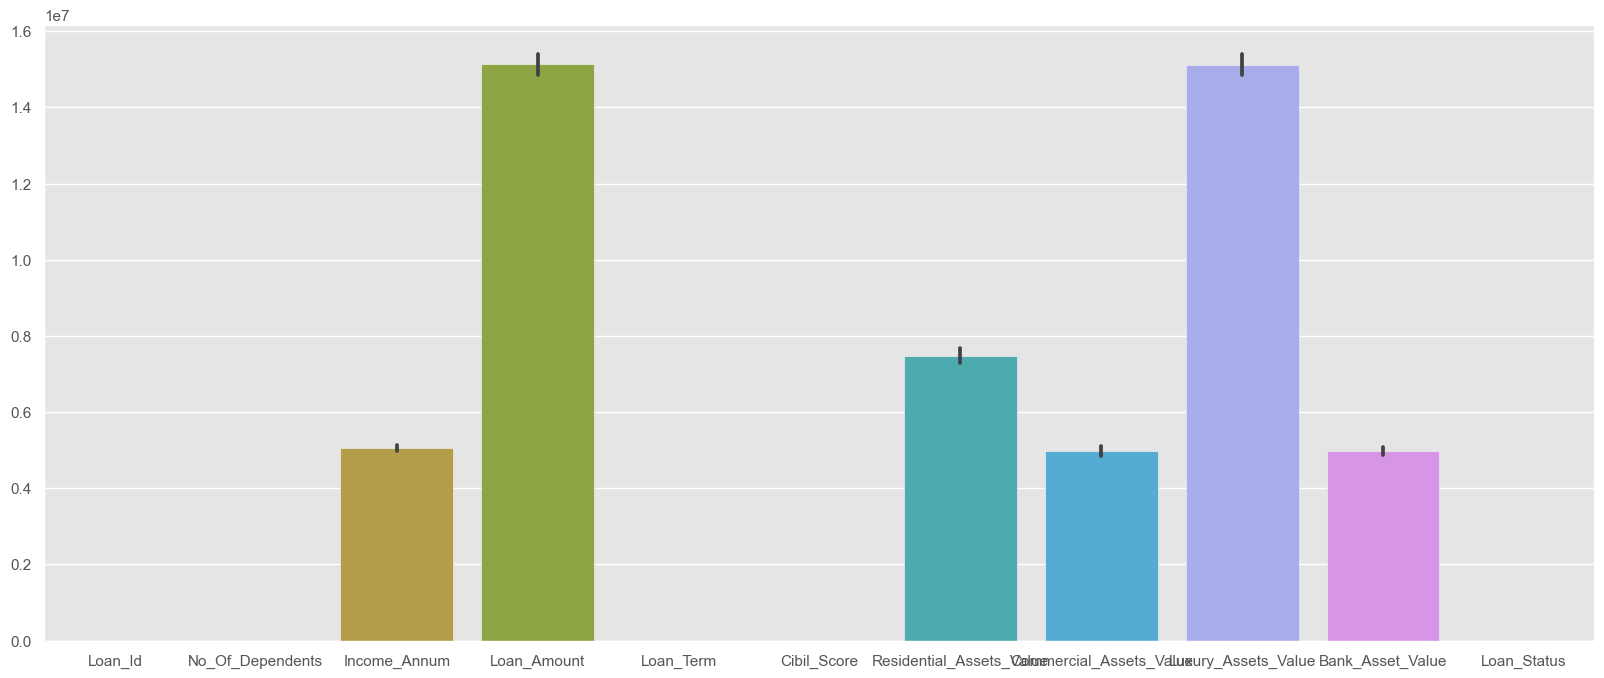

In [65]:
plt.figure(figsize=(20,8))
sns.barplot(data=df2)

In [66]:
df3=df2.drop('Loan_Status', axis=1)
df3.drop('Self_Employed', axis=1)

Loan_Id  No_Of_Dependents  Income_Annum  Loan_Amount  Loan_Term  \
0           1                 2       9600000     29900000         12   
1           2                 0       4100000     12200000          8   
2           3                 3       9100000     29700000         20   
3           4                 3       8200000     30700000          8   
4           5                 5       9800000     24200000         20   
...       ...               ...           ...          ...        ...   
4264     4265                 5       1000000      2300000         12   
4265     4266                 0       3300000     11300000         20   
4266     4267                 2       6500000     23900000         18   
4267     4268                 1       4100000     12800000          8   
4268     4269                 1       9200000     29700000         10   

      Cibil_Score  Residential_Assets_Value  Commercial_Assets_Value  \
0             778                   2400000                 17600000   
1             417                   2700000                  2200000   
2             506                   7100000                  4500000   
3             467                  18200000                  3300000   
4             382                  12400000                  8200000   
...           ...                       ...                      ...   
4264          317                   2800000                   500000   
4265          559                   4200000                  2900000   
4266          457                   1200000                 12400000   
4267          780                   8200000                   700000   
4268          607                  17800000                 11800000   

      Luxury_Assets_Value  Bank_Asset_Value  
0                22700000           8000000  
1                 8800000           3300000  
2                33300000          12800000  
3                23300000           7900000  
4                29400000           5000000  
...                   ...               ...  
4264              3300000            800000  
4265             11000000           1900000  
4266             18100000           7300000  
4267             14100000           5800000  
4268             35700000          12000000  

[4269 rows x 10 columns]

### * Correalting them with each other

In [67]:
df.corr()

No_Of_Dependents  Income_Annum  Loan_Amount  \
No_Of_Dependents                  1.000000      0.007266    -0.003366   
Income_Annum                      0.007266      1.000000     0.927470   
Loan_Amount                      -0.003366      0.927470     1.000000   
Loan_Term                        -0.020111      0.011488     0.008437   
Cibil_Score                      -0.009998     -0.023034    -0.017035   
Residential_Assets_Value          0.007769      0.632992     0.592026   
Commercial_Assets_Value          -0.007962      0.629147     0.591205   
Luxury_Assets_Value               0.002817      0.929145     0.860914   
Bank_Asset_Value                  0.009436      0.848120     0.785354   
Loan_Status                      -0.018114     -0.015189     0.016150   

                          Loan_Term  Cibil_Score  Residential_Assets_Value  \
No_Of_Dependents          -0.020111    -0.009998                  0.007769   
Income_Annum               0.011488    -0.023034                  0.632992   
Loan_Amount                0.008437    -0.017035                  0.592026   
Loan_Term                  1.000000     0.007810                  0.007787   
Cibil_Score                0.007810     1.000000                 -0.020488   
Residential_Assets_Value   0.007787    -0.020488                  1.000000   
Commercial_Assets_Value   -0.006080    -0.001338                  0.411087   
Luxury_Assets_Value        0.012490    -0.028618                  0.587224   
Bank_Asset_Value           0.017414    -0.014769                  0.522085   
Loan_Status               -0.113036     0.770518                 -0.015120   

                          Commercial_Assets_Value  Luxury_Assets_Value  \
No_Of_Dependents                        -0.007962             0.002817   
Income_Annum                             0.629147             0.929145   
Loan_Amount                              0.591205             0.860914   
Loan_Term                               -0.006080             0.012490   
Cibil_Score                             -0.001338            -0.028618   
Residential_Assets_Value                 0.411087             0.587224   
Commercial_Assets_Value                  1.000000             0.581093   
Luxury_Assets_Value                      0.581093             1.000000   
Bank_Asset_Value                         0.536234             0.785703   
Loan_Status                              0.008233            -0.015465   

                          Bank_Asset_Value  Loan_Status  
No_Of_Dependents                  0.009436    -0.018114  
Income_Annum                      0.848120    -0.015189  
Loan_Amount                       0.785354     0.016150  
Loan_Term                         0.017414    -0.113036  
Cibil_Score                      -0.014769     0.770518  
Residential_Assets_Value          0.522085    -0.015120  
Commercial_Assets_Value           0.536234     0.008233  
Luxury_Assets_Value               0.785703    -0.015465  
Bank_Asset_Value                  1.000000    -0.006727  
Loan_Status                      -0.006727     1.000000

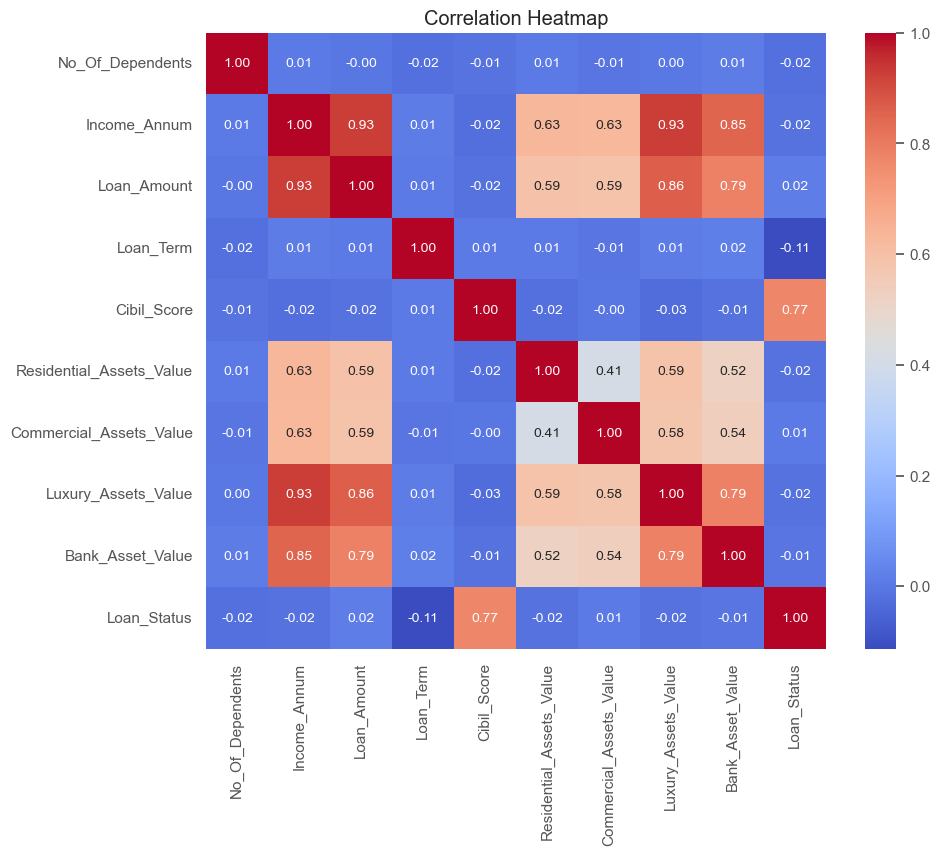

In [68]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [69]:
df.head()

No_Of_Dependents  Income_Annum  Loan_Amount  Loan_Term  Cibil_Score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   Residential_Assets_Value  Commercial_Assets_Value  Luxury_Assets_Value  \
0                 2400000.0               16750000.0             22700000   
1                 2700000.0                2200000.0              8800000   
2                 7100000.0                4500000.0             33300000   
3                18200000.0                3300000.0             23300000   
4                12400000.0                8200000.0             29400000   

   Bank_Asset_Value  Loan_Status  
0         8000000.0            1  
1         3300000.0            0  
2        12800000.0            0  
3         7900000.0            0  
4         5000000.0            0

### * Dropping the Target Variable

In [70]:
x=df.drop('Loan_Status',axis=1)
x

No_Of_Dependents  Income_Annum  Loan_Amount  Loan_Term  Cibil_Score  \
0                    2       9600000     29900000         12          778   
1                    0       4100000     12200000          8          417   
2                    3       9100000     29700000         20          506   
3                    3       8200000     30700000          8          467   
4                    5       9800000     24200000         20          382   
...                ...           ...          ...        ...          ...   
4264                 5       1000000      2300000         12          317   
4265                 0       3300000     11300000         20          559   
4266                 2       6500000     23900000         18          457   
4267                 1       4100000     12800000          8          780   
4268                 1       9200000     29700000         10          607   

      Residential_Assets_Value  Commercial_Assets_Value  Luxury_Assets_Value  \
0                    2400000.0               16750000.0             22700000   
1                    2700000.0                2200000.0              8800000   
2                    7100000.0                4500000.0             33300000   
3                   18200000.0                3300000.0             23300000   
4                   12400000.0                8200000.0             29400000   
...                        ...                      ...                  ...   
4264                 2800000.0                 500000.0              3300000   
4265                 4200000.0                2900000.0             11000000   
4266                 1200000.0               12400000.0             18100000   
4267                 8200000.0                 700000.0             14100000   
4268                17800000.0               11800000.0             35700000   

      Bank_Asset_Value  
0            8000000.0  
1            3300000.0  
2           12800000.0  
3            7900000.0  
4            5000000.0  
...                ...  
4264          800000.0  
4265         1900000.0  
4266         7300000.0  
4267         5800000.0  
4268        12000000.0  

[4269 rows x 9 columns]

In [71]:
y=df['Loan_Status']
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: Loan_Status, Length: 4269, dtype: int64

## Training,Testing and Fitting the Machine Learning Models

### 1) Decsion Tree Classifier

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [75]:
Y_pred1=model.predict(X_test)

In [76]:
from sklearn import metrics
Accuracy1 = metrics.accuracy_score(Y_test, Y_pred1)
print(Accuracy1*100,"%")

97.65807962529274 %


In [77]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred1)

<Axes: >

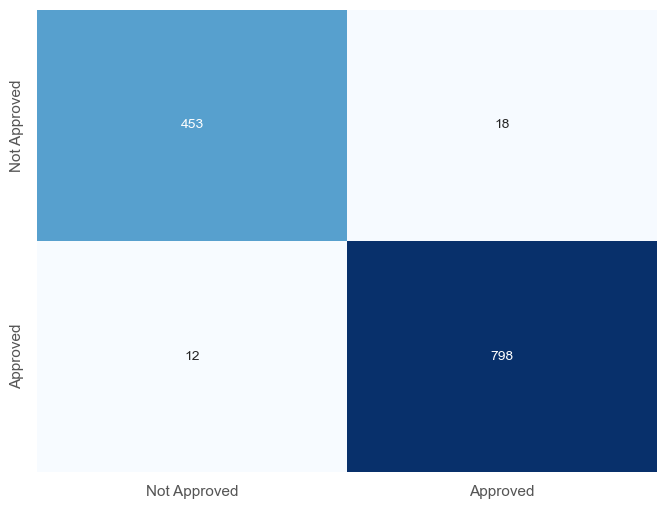

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])

### 2) Support Vector Machine (SVM)

In [79]:
# Model 2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [81]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [82]:
y_pred2 = svm_model.predict(X_test)

In [83]:
X_test['predictions']=y_pred2
X_test['Actual']=y_test
X_test

No_Of_Dependents  Income_Annum  Loan_Amount  Loan_Term  Cibil_Score  \
1703                 5       5400000     19700000         20          423   
1173                 2       5900000     14000000          8          599   
308                  3       9600000     19900000         14          452   
1322                 2       6200000     23400000          8          605   
3271                 3       5800000     14100000         12          738   
...                ...           ...          ...        ...          ...   
1842                 0       2100000      5900000         14          402   
3415                 3        500000      2000000         12          890   
3291                 5       8400000     31900000         10          605   
2016                 4       5800000     14200000         20          535   
679                  0        900000      3600000         10          683   

      Residential_Assets_Value  Commercial_Assets_Value  Luxury_Assets_Value  \
1703                 6500000.0             1.000000e+07             15700000   
1173                 4700000.0             9.500000e+06             17800000   
308                  4200000.0             1.620000e+07             28500000   
1322                10000000.0             1.080000e+07             21800000   
3271                11700000.0             4.400000e+06             15400000   
...                        ...                      ...                  ...   
1842                 4400000.0             5.101009e+06              4800000   
3415                  800000.0             7.000000e+05              1800000   
3291                18900000.0             1.030000e+07             22000000   
2016                10200000.0             4.000000e+06             21100000   
679                  1400000.0             7.000000e+05              3500000   

      Bank_Asset_Value  predictions  Actual  
1703         7300000.0            1       0  
1173         6700000.0            1       1  
308          6600000.0            1       0  
1322         9200000.0            1       1  
3271         8400000.0            1       1  
...                ...          ...     ...  
1842         1000000.0            1       0  
3415          400000.0            1       1  
3291         9100000.0            1       1  
2016         3400000.0            1       0  
679           400000.0            1       1  

[1281 rows x 11 columns]

In [84]:
# Checking accuracy
Accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy2: {Accuracy2 * 100:.2f} %")

Accuracy2: 63.23 %


In [85]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred2)

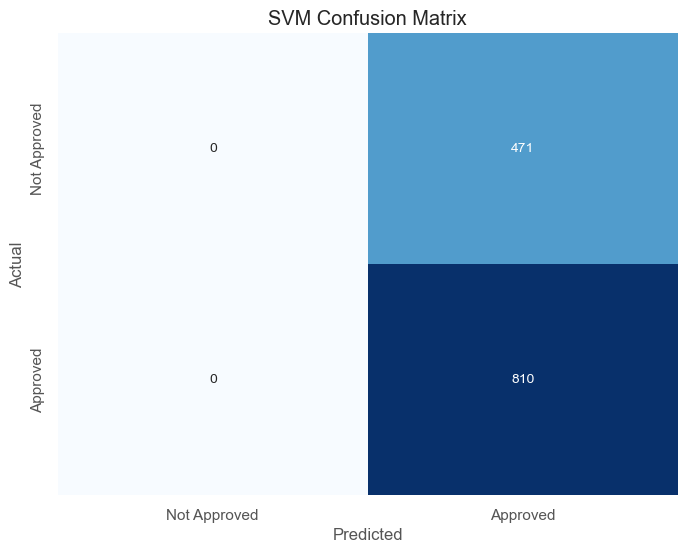

In [86]:
# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

### 3) Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [88]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [89]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_pred3 = rf.predict(X_test)

In [91]:
X_test['predictions']=y_pred3
X_test['Actual']=y_test
X_test

No_Of_Dependents  Income_Annum  Loan_Amount  Loan_Term  Cibil_Score  \
1703                 5       5400000     19700000         20          423   
1173                 2       5900000     14000000          8          599   
308                  3       9600000     19900000         14          452   
1322                 2       6200000     23400000          8          605   
3271                 3       5800000     14100000         12          738   
...                ...           ...          ...        ...          ...   
1842                 0       2100000      5900000         14          402   
3415                 3        500000      2000000         12          890   
3291                 5       8400000     31900000         10          605   
2016                 4       5800000     14200000         20          535   
679                  0        900000      3600000         10          683   

      Residential_Assets_Value  Commercial_Assets_Value  Luxury_Assets_Value  \
1703                 6500000.0             1.000000e+07             15700000   
1173                 4700000.0             9.500000e+06             17800000   
308                  4200000.0             1.620000e+07             28500000   
1322                10000000.0             1.080000e+07             21800000   
3271                11700000.0             4.400000e+06             15400000   
...                        ...                      ...                  ...   
1842                 4400000.0             5.101009e+06              4800000   
3415                  800000.0             7.000000e+05              1800000   
3291                18900000.0             1.030000e+07             22000000   
2016                10200000.0             4.000000e+06             21100000   
679                  1400000.0             7.000000e+05              3500000   

      Bank_Asset_Value  predictions  Actual  
1703         7300000.0            0       0  
1173         6700000.0            1       1  
308          6600000.0            0       0  
1322         9200000.0            1       1  
3271         8400000.0            1       1  
...                ...          ...     ...  
1842         1000000.0            0       0  
3415          400000.0            1       1  
3291         9100000.0            1       1  
2016         3400000.0            0       0  
679           400000.0            1       1  

[1281 rows x 11 columns]

In [92]:
from sklearn.metrics import accuracy_score
Accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", Accuracy3*100,"%")

Accuracy: 97.73614363778297 %


In [93]:
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred3)

<Axes: >

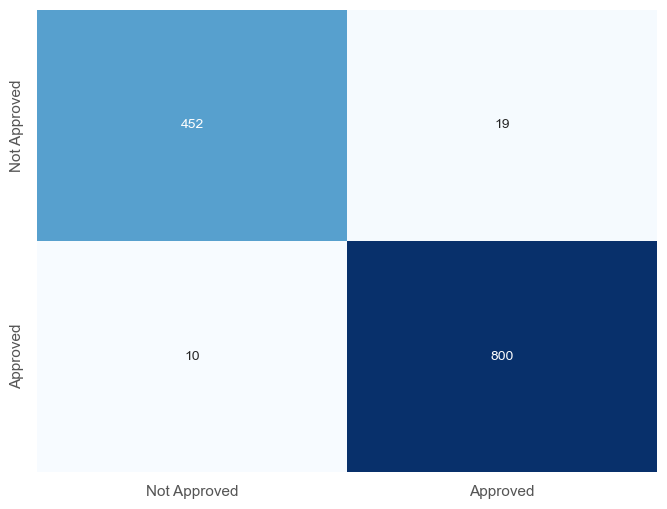

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False,
             xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])

### 4) Ensemble Model

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [97]:
model_1 = svm.SVC(probability=True, random_state=42)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()

In [98]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

In [100]:
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier

In [101]:
voting = VotingClassifier(estimators=[
    ('svm', model_1),
    ('tree', model_2),
    ('rf', model_3)
], voting='soft') 
# 'hard' for majority voting, 'soft' for probability-based voting

In [102]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                             ('tree', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [103]:
y_pred4 = voting.predict(X_test)

In [104]:
X_test['predictions']=y_pred4
X_test['Actual']=y_test
X_test

No_Of_Dependents  Income_Annum  Loan_Amount  Loan_Term  Cibil_Score  \
737                  2        900000      2500000         16          458   
3850                 5       2500000      9400000         16          735   
2044                 4       3800000      8500000         10          416   
1900                 5       4300000     14100000         12          532   
3373                 0       9300000     24500000         10          600   
...                ...           ...          ...        ...          ...   
1251                 5       2600000      9100000          4          309   
1528                 5        400000       800000          2          759   
1964                 3       3800000     11800000          4          694   
4191                 2       9900000     37300000          8          385   
1119                 0       8100000     23800000         10          794   

      Residential_Assets_Value  Commercial_Assets_Value  Luxury_Assets_Value  \
737              -1.000000e+05                 100000.0              3200000   
3850              7.552225e+06                2200000.0              9500000   
2044              6.200000e+06                4800000.0             14900000   
1900              1.260000e+07                5700000.0             12000000   
3373              2.020000e+07                 700000.0             32600000   
...                        ...                      ...                  ...   
1251              6.400000e+06                1400000.0              5900000   
1528              1.000000e+05                 500000.0              1300000   
1964              7.552225e+06                 500000.0              8300000   
4191              6.000000e+05                 900000.0             27400000   
1119              5.400000e+06               15500000.0             20700000   

      Bank_Asset_Value  predictions  Actual  
737          1100000.0            0       0  
3850         1700000.0            1       1  
2044         4100000.0            0       0  
1900         4600000.0            0       0  
3373         5400000.0            1       1  
...                ...          ...     ...  
1251         3400000.0            1       1  
1528          300000.0            1       1  
1964         5100000.0            1       1  
4191        14150000.0            0       0  
1119         8800000.0            1       1  

[1281 rows x 11 columns]

In [105]:
from sklearn.metrics import accuracy_score
Accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy4:", Accuracy4*100,"%")

Accuracy4: 98.43871975019516 %


In [106]:
confusion_matrix3 = metrics.confusion_matrix(y_test, y_pred4)

<Axes: >

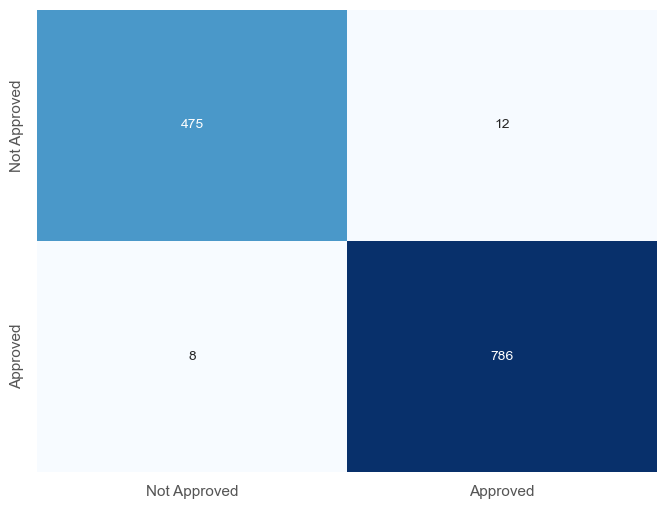

In [107]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])

### Comparing accuracy of each ML Model

In [108]:
models = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'SVM', 'Random Forest Classifier', 'Ensemble'],
    'Score': [100*round(Accuracy1,4), 100*round(Accuracy2,4), 100*round(Accuracy3,4), 100*round(Accuracy4,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
3                  Ensemble  98.44
2  Random Forest Classifier  97.74
0  Decision Tree Classifier  97.66
1                       SVM  63.23

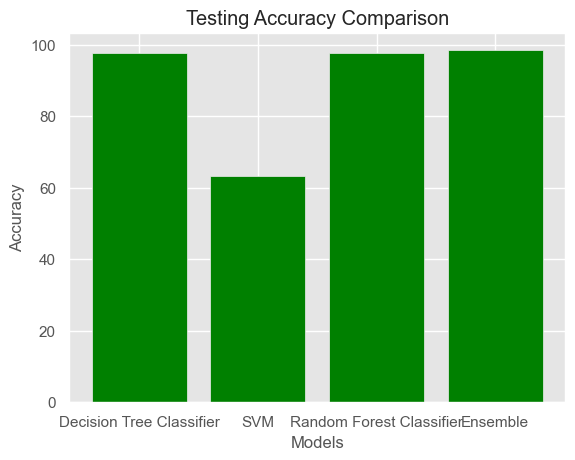

In [109]:
models =  ['Decision Tree Classifier', 'SVM', 'Random Forest Classifier', 'Ensemble']
accuracy = [100*round(Accuracy1,4), 100*round(Accuracy2,4), 100*round(Accuracy3,4), 100*round(Accuracy4,4)]
plt.bar(models, accuracy, color='green')
plt.title('Testing Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()